## ÊÇ£ËÄÖÊäïËØâÂàÜÁ±ª

### 1„ÄÅZeroShotPromptTemplate: 20%Ê†∑Êú¨Áõ¥Êé•ËøõË°åÊµãËØï    
### 2„ÄÅFewShotPromptTemplateÔºöÊú™ÂÖ®ÈáèÊµãËØïÔºåÊïàÊûúÁï•‰ºò‰∫éÊñπÊ≥ï1    
### 3„ÄÅËØªÂÖ•Ë°®Êñá‰ª∂ÂêéËøõË°åÊñáÊú¨ÂàÜÁ±ªÔºö80%Â≠¶‰π†Ôºå20%ÊµãËØï  
### 4„ÄÅÊú¨Âú∞Áü•ËØÜÂ∫ìembeddingÔºö80%Â≠¶‰π†Ôºå20%ÊµãËØï    
### 5„ÄÅËøõË°åFine_tuningÔºö80%Â≠¶‰π†Ôºå20%ÊµãËØï

#### ÂéüÂßãÊ†∑Êú¨685Êù°„ÄÅ22‰∏™Á±ªÂà´ÔºõÊ∏ÖÊ¥ó„ÄÅËßÑÊï¥„ÄÅÊ∂àÈô§Â∞æÈÉ®Á±ªÂà´ÂêéÔºåÂÆûÈôÖÊ†∑Êú¨635Êù°„ÄÅ11‰∏™Á±ªÂà´

#### 1„ÄÅzeroshot (GPT3.5): Accuracy 0.60ÔºåÂä†ÊùÉPrecision 0.69ÔºåÂä†ÊùÉRecall 0.60ÔºåÂä†ÊùÉF1 0.61
#### 3„ÄÅtable agent (GPT3): Accuracy 0.49ÔºåÂä†ÊùÉPrecision 0.57ÔºåÂä†ÊùÉRecall 0.49ÔºåÂä†ÊùÉF1 0.49
#### 4„ÄÅembedding (GPT3.5): Accuracy 0.62ÔºåÂä†ÊùÉPrecision 0.74ÔºåÂä†ÊùÉRecall 0.62ÔºåÂä†ÊùÉF1 0.66
#### 5„ÄÅFine_tuning (GPT3): Accuracy 0.76ÔºåÂä†ÊùÉPrecision 0.84ÔºåÂä†ÊùÉRecall 0.76ÔºåÂä†ÊùÉF1 0.75

### 1„ÄÅÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÔºöÈáçÊñ∞‰∫∫Â∑•ÊâìÊ†á„ÄÅÂâîÈô§Â∞æÈÉ®Á±ªÂà´

In [1]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import pandas as pd
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAIChat
import os

os.environ["OPENAI_API_KEY"] = '***'

In [2]:
df_origin = pd.read_excel('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/CaseSample_Adj.xlsx')
df_origin

Case Description (HAGo)  \
0    Cant login to ha go account nor forgot usernam...   
1    Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...   
2    Cant login to ha go account nor forgot usernam...   
3    ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...   
4                                               ÊúâÂÜáËôïÁêÜÁ∑ä?   
..                                                 ...   
680  ‰Ω†Â•ΩÔºåÊàëÂ™ΩÂ™ΩÊñº2022Âπ¥8ÊúàÂú®ËçÉÁÅ£Êà¥È∫üË∂æË®∫ÊâÄÊäΩË°ÄÔºåÁÇ∫‰ªÄÈ∫ºÂú®HA Go Êâæ‰∏çÂà∞ÈÄô‰ªΩÂåñÈ©óÂ†±ÂëäÔºåË´ã...   
681  ‰Ω†Â•ΩÔºÅË´ãÂïèÊàëÂú®HAÂÅö‰∫ÜÈ©óË°ÄÂèäÈ©óÂ∞øÁ≠âÂæåÔºåË¶ÅÂπæÂ§öÂ§©ÊâçÊúâÂ†±ÂëäÔºüËÄåÈÇ£‰∫õÂ†±ÂëäÂèàË¶ÅÂ§öÂ∞ëÂ§©Êâç‰∏äÂÇ≥Âà∞ÊàëÁöÑHA...   
682  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...   
683  Ë´ãÂïèHA Go „ÄåÊàëÁöÑÂÅ•Â∫∑„ÄçÂÖßÁöÑ„ÄåÊàëÁöÑÁ¥ÄÈåÑ„ÄçÂÖß„ÄåÊàëÁöÑÂ†±Âëä„ÄçÁöÑÈ©óË°ÄÂ†±ÂëäÁùáÈÜ´ÁîüÂæåÂπæÊôÇÊúÉÊîæ‰∏äHA ...   
684  Hi,  \n\nÁÇ∫ÁîöÈ∫ºÈ©óË°ÄÂåñÈ©óÂ†±ÂëäÊúâÈóúLipid ProfileÔºåGlu. Fasting...   

                     Category Adj_Category  
0               Login/ Logout        Login  
1                       Minor        Minor  
2    Registration/ Activation        Login  
3    Registration/ Activation        Login  
4               Login/ Logout       Others  
..                        ...          ...  
680                 My Record    My Record  
681                 My Record    My Record  
682                 My Record    My Record  
683                 My Record    My Record  
684                 My Record    My Record  

[685 rows x 3 columns]

In [175]:
df_origin.to_csv('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/origin_24class.csv', encoding='utf_8_sig')

In [4]:
## ÂéªÈáçÂêéÔºå‰∏ÄÂÖ±Êúâ685Êù°ÂÆû‰æã„ÄÅ22‰∏™Á±ªÂà´
df_origin.describe()

Case Description (HAGo)       Category  \
count                                                 685            685   
unique                                                677             22   
top     ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...  Login/ Logout   
freq                                                    3            146   

       Adj_Category  
count           685  
unique           24  
top           Login  
freq            139

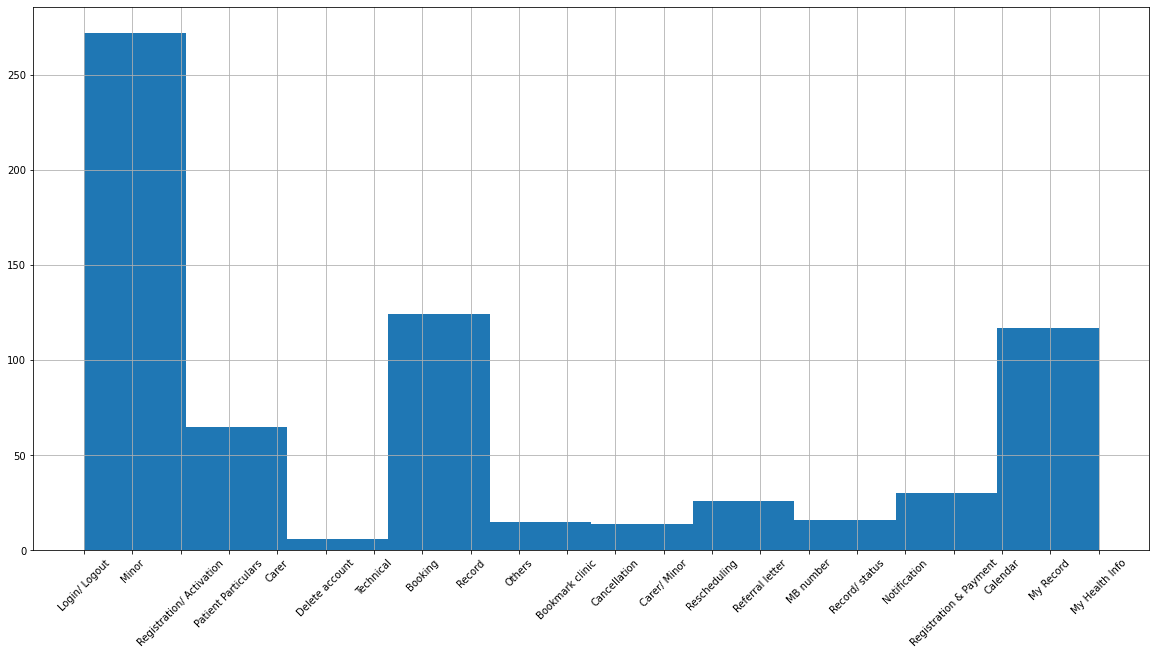

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
df_origin['Category'].hist()
plt.show()

In [12]:
## ÈáçÊñ∞‰∫∫Â∑•ÊâìÊ†áËßÑÊï¥ÔºåÂéªÈô§Â∞æÈÉ®Á±ªÂà´

df_sample = pd.read_excel('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/SampleDataset_11class.xlsx')
df_sample

Case Description (HAGo)   LABEL
0    Cant login to ha go account nor forgot usernam...   Login
1    Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...   Minor
2    Cant login to ha go account nor forgot usernam...   Login
3    ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...   Login
4                                               ÊúâÂÜáËôïÁêÜÁ∑ä?  Others
..                                                 ...     ...
627  ‰Ω†Â•ΩÔºåÊàëÂ™ΩÂ™ΩÊñº2022Âπ¥8ÊúàÂú®ËçÉÁÅ£Êà¥È∫üË∂æË®∫ÊâÄÊäΩË°ÄÔºåÁÇ∫‰ªÄÈ∫ºÂú®HA Go Êâæ‰∏çÂà∞ÈÄô‰ªΩÂåñÈ©óÂ†±ÂëäÔºåË´ã...  Record
628  ‰Ω†Â•ΩÔºÅË´ãÂïèÊàëÂú®HAÂÅö‰∫ÜÈ©óË°ÄÂèäÈ©óÂ∞øÁ≠âÂæåÔºåË¶ÅÂπæÂ§öÂ§©ÊâçÊúâÂ†±ÂëäÔºüËÄåÈÇ£‰∫õÂ†±ÂëäÂèàË¶ÅÂ§öÂ∞ëÂ§©Êâç‰∏äÂÇ≥Âà∞ÊàëÁöÑHA...  Record
629  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...  Record
630  Ë´ãÂïèHA Go „ÄåÊàëÁöÑÂÅ•Â∫∑„ÄçÂÖßÁöÑ„ÄåÊàëÁöÑÁ¥ÄÈåÑ„ÄçÂÖß„ÄåÊàëÁöÑÂ†±Âëä„ÄçÁöÑÈ©óË°ÄÂ†±ÂëäÁùáÈÜ´ÁîüÂæåÂπæÊôÇÊúÉÊîæ‰∏äHA ...  Record
631  Hi,¬† \n\nÁÇ∫ÁîöÈ∫ºÈ©óË°ÄÂåñÈ©óÂ†±ÂëäÊúâÈóúLipid ProfileÔºåGlu. Fasting...  Record

[632 rows x 2 columns]

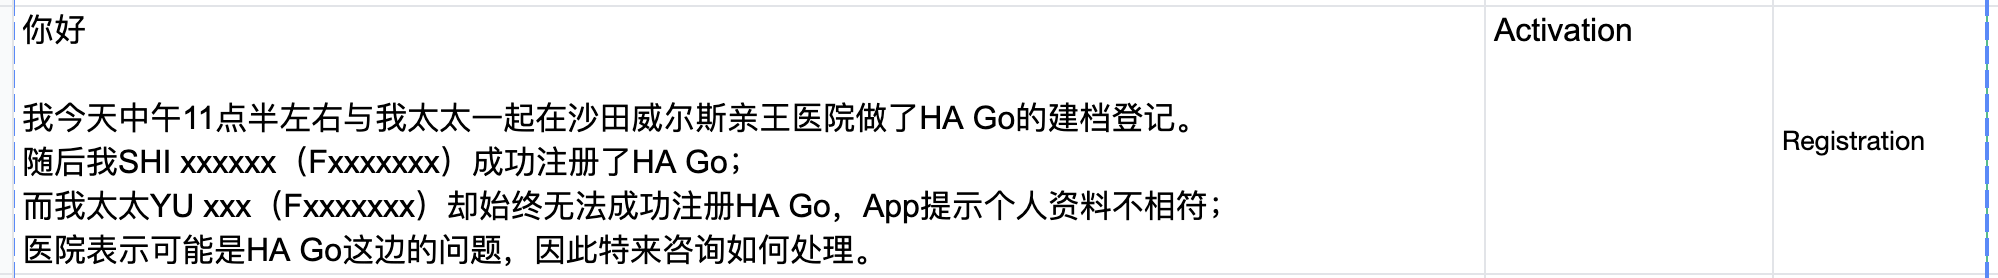
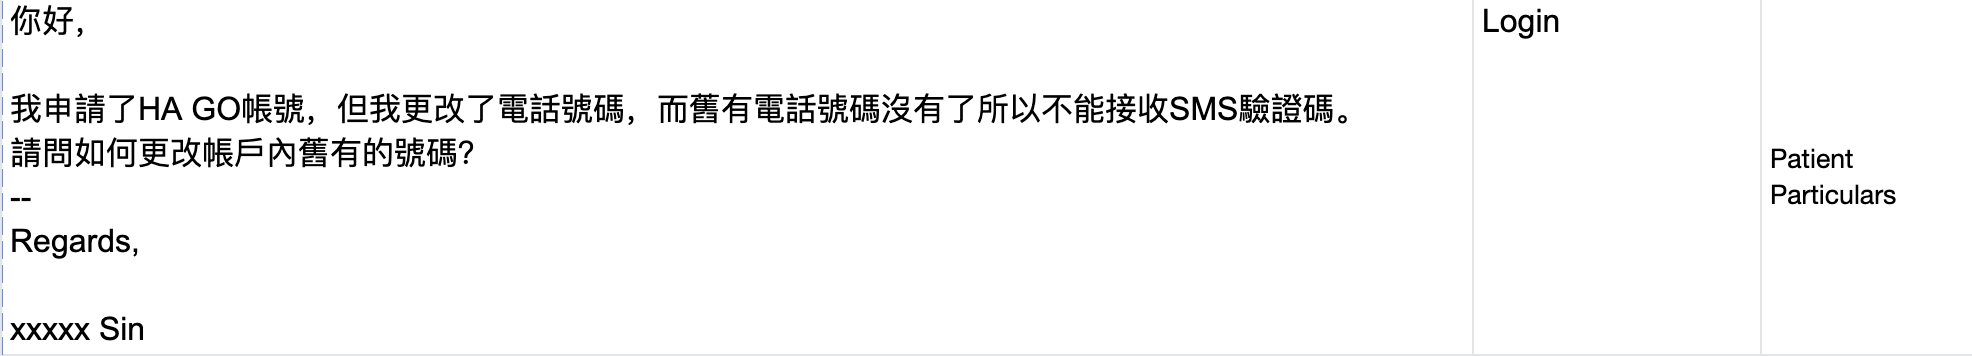

In [13]:
## ÂéªÈáçÂêéÔºå‰∏ÄÂÖ±Êúâ632Êù°ÂÆû‰æã„ÄÅ11‰∏™Á±ªÂà´
df_sample.describe()

Case Description (HAGo)   LABEL
count                                                 632     632
unique                                                632      11
top     Cant login to ha go account nor forgot usernam...  Record
freq                                                    1     173

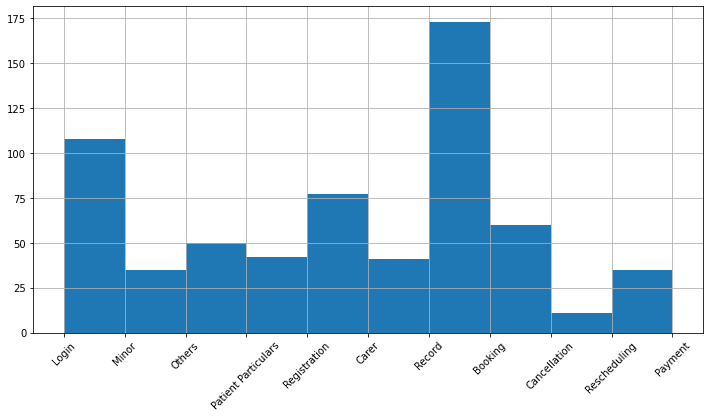

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
df_sample['LABEL'].hist()
plt.show()

In [110]:
## Ê∂àÈô§Êç¢Ë°åÁ¨¶
df_sample['Case Description (HAGo)']=df_sample['Case Description (HAGo)'].apply(lambda x: x.replace("\n","."))
df_sample

Case Description (HAGo)   LABEL
0    Cant login to ha go account nor forgot usernam...   Login
1    Dear Sir,  ‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ‰ª•...   Minor
2    Cant login to ha go account nor forgot usernam...   Login
3    ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...   Login
4                                               ÊúâÂÜáËôïÁêÜÁ∑ä?  Others
..                                                 ...     ...
627  ‰Ω†Â•ΩÔºåÊàëÂ™ΩÂ™ΩÊñº2022Âπ¥8ÊúàÂú®ËçÉÁÅ£Êà¥È∫üË∂æË®∫ÊâÄÊäΩË°ÄÔºåÁÇ∫‰ªÄÈ∫ºÂú®HA Go Êâæ‰∏çÂà∞ÈÄô‰ªΩÂåñÈ©óÂ†±ÂëäÔºåË´ã...  Record
628  ‰Ω†Â•ΩÔºÅË´ãÂïèÊàëÂú®HAÂÅö‰∫ÜÈ©óË°ÄÂèäÈ©óÂ∞øÁ≠âÂæåÔºåË¶ÅÂπæÂ§öÂ§©ÊâçÊúâÂ†±ÂëäÔºüËÄåÈÇ£‰∫õÂ†±ÂëäÂèàË¶ÅÂ§öÂ∞ëÂ§©Êâç‰∏äÂÇ≥Âà∞ÊàëÁöÑHA...  Record
629  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...  Record
630  Ë´ãÂïèHA Go „ÄåÊàëÁöÑÂÅ•Â∫∑„ÄçÂÖßÁöÑ„ÄåÊàëÁöÑÁ¥ÄÈåÑ„ÄçÂÖß„ÄåÊàëÁöÑÂ†±Âëä„ÄçÁöÑÈ©óË°ÄÂ†±ÂëäÁùáÈÜ´ÁîüÂæåÂπæÊôÇÊúÉÊîæ‰∏äHA ...  Record
631  Hi,¬†   ÁÇ∫ÁîöÈ∫ºÈ©óË°ÄÂåñÈ©óÂ†±ÂëäÊúâÈóúLipid ProfileÔºåGlu. FastingÈ†ÖÊ≤í...  Record

[632 rows x 2 columns]

### 2„ÄÅÊ†∑Êú¨Êï∞ÊçÆÈõÜÂàáÂàÜ

In [111]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df_sample, test_size=0.2, random_state=26)

In [103]:
data_test_sample = data_test.iloc[0:3,0:1]
df_test_sample = pd.DataFrame(data_test_sample)
df_test_sample.columns = ['Case']
df_test_sample

Case
218  My ID card no has 2 English Prefix but the sys...
605                      1/2 ÁöÑÊäΩË°ÄÂ†±ÂëäÊ≤íÊúâÂá∫ÁèæÂú®ha go, Ë´ãÂπ´ÊàëÊü•ÂêìÔºåË¨ùË¨ù
467  Hi   Êú¨‰∫∫(Lam xxx xxxx/I.d.no.Dxxxxxx(x) ÊàëÊü•ÁúãÈÅéHA ...

### 3.1 zeroshot Èõ∂Ê†∑Êú¨Â≠¶‰π†

In [108]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAIChat
import os

llm = OpenAIChat(model_name='gpt-3.5-turbo', 
             temperature=0, 
             max_tokens = 1000)

# ÂëäËØâ‰ªñÊàë‰ª¨ÁîüÊàêÁöÑÂÜÖÂÆπÈúÄË¶ÅÂì™‰∫õÂ≠óÊÆµÔºåÊØè‰∏™Â≠óÊÆµÁ±ªÂûã
response_categories = ['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']


print(response_categories)


template = """
‰Ω†ÊòØ‰∏Ä‰ΩçAPPÈóÆÈ¢òËß£ÂÜ≥Âä©ÊâãÔºåËØ∑ËØÜÂà´Âπ∂ÁêÜËß£Áî®Êà∑ÊèèËø∞Ôºå‰ªé{response_categories}‰∏≠ËØÜÂà´Áî®Êà∑ÁöÑÈúÄÊ±Ç?
Ê≥®ÊÑèÔºåÂè™‰ªéÁªôÂÆöÁöÑÈúÄÊ±ÇËåÉÂõ¥ÂÜÖËøîÂõûÊÑèÂõæÊúÄÂº∫ÁÉàÁ±ªÂà´ÁöÑÂÄºÂç≥ÂèØÔºå‰∏çÈúÄË¶Å‰ªª‰ΩïÂÖ∂‰ªñ‰ø°ÊÅØ
Â¶ÇÊûú‰Ω†Âà§Êñ≠Áî®Êà∑Âá†ÁßçÊÑèÂõæÊ¶ÇÁéá‰∏ÄÊ†∑ÔºåÂ∞±ËæìÂá∫Á¨¨‰∏Ä‰∏™Âç≥ÂèØ

% USER INPUT:
{user_input}

‰Ω†ÁöÑÂõûÂ§ç:
"""


# ÊúâÂ§ö‰∏™ËæìÂÖ•ÂèòÈáèÁöÑÁ§∫‰æã prompt
multiple_input_prompt = PromptTemplate(
    input_variables=["response_categories", "user_input"], 
    template= template
)

promptValue = multiple_input_prompt.format(response_categories=response_categories, user_input="ÂøòË®òÂêçÁ®±ÂèäÂØÜÁ¢º")
# -> "Tell me a funny joke about chickens."


result_list=[]
for i in df_test_sample['Case'].iloc[0:3]:
    #user_input = i
    promptValue = multiple_input_prompt.format(response_categories=response_categories, user_input=i)
    llm_output = llm(promptValue)
    print(i)
    result_list.append(llm_output)

#promptValue = prompt.format(response_categories, user_input)
# llm_output = llm(promptValue)

# print(llm_output)

['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']
My ID card no has 2 English Prefix but the system only allow me to type in one. How could I register?  eg. XA******(*)  But you only allow to type in 1 Letter
1/2 ÁöÑÊäΩË°ÄÂ†±ÂëäÊ≤íÊúâÂá∫ÁèæÂú®ha go, Ë´ãÂπ´ÊàëÊü•ÂêìÔºåË¨ùË¨ù
Hi   Êú¨‰∫∫(Lam xxx xxxx/I.d.no.Dxxxxxx(x) ÊàëÊü•ÁúãÈÅéHA GO record, 20 Nov 2023 ÊòØÊúâÁöÆËÜöÁßëÈ†êÁ∫¶Â∑¶Ôºå‰ΩÜË≥áÊñôÊ≤íÊúâÈ°ØÁ§∫Âú®systemÂÖßÔºåPl.¬† Cross check and reconfirm again to me by phone no. 6xxxxxxx   Tks


In [113]:
data_test.columns = ['Case','LABEL']
data_test_x = data_test['Case']
data_test_x

218    My ID card no has 2 English Prefix but the sys...
605                        1/2 ÁöÑÊäΩË°ÄÂ†±ÂëäÊ≤íÊúâÂá∫ÁèæÂú®ha go, Ë´ãÂπ´ÊàëÊü•ÂêìÔºåË¨ùË¨ù
467    Hi   Êú¨‰∫∫(Lam xxx xxxx/I.d.no.Dxxxxxx(x) ÊàëÊü•ÁúãÈÅéHA ...
35                 ÊàëÊèõ‰∫ÜÊñ∞ÊâãÊ©ü, ÊúâÂΩ±ÊôåÂóéÔºü ËàäÊâãÊ©üÂâáËÉΩÁôªÂÖ•Ôºü ÊòØÁî®Áõ∏ÂêåÊà∑ÂêçÂèäÂØÜÁ¢ºÂéªÂÅöÁôªÂÖ•ÁöÑ
329      ÈÄôÂÄãÈ†êÁ¥ÑÁ®ãÂºèÈõñË¶ÅÊõ¥ÊîπÔºÅ Á≥ªÁµ±ÊáâË©≤ÂØ¶ÊôÇÈ°ØÁ§∫ÂêÑÂñÆ‰ΩçÁöÑÊú™Á¥ÑÈ†êÈ°ç‰ª•‰æõÈÅ∏ÊìáÔºåËÄåÈùûË¶ÅÊ±ÇÁóÖ‰∫∫ÈÄêÂÄãÂñÆ‰ΩçÂéªÊü•Ë®äÔºÅ
                             ...                        
110    ‰Ω†Â•ΩÔºå ÊàëÊÉ≥Ê∑ªÂä†Ê≤íÊúâÊô∫ËÉΩÈõªË©±ÁöÑÈï∑ËÄÖ‰ΩúÁÇ∫ÊàëÁöÑË¢´ÁÖßÈ°ßËÄÖÔºå Ê≤íÊúâq r codeÂèØ‰ª• scanÔºå ...
273    ÊàëÂâõÊî∂Âà∞ÊúâÈóúHA GoÊâãÊèêÈõªË©±ÁöÑÂØ¶ÂêçÁôªË®òË®äÊÅØ„ÄÇ‰ΩÜÔºåÊàëÈÄôÂÄãÈõªË©±ËôüÁ¢ºÊòØ‰∏àÂ§´Âú®ÈõªË®äÂÖ¨Âè∏ÁöÑÂÆ∂Â∫≠pla...
413    ÁéãÂ•≥Â£´ÊåáÂ•π‰∏çËÉΩÂú®HA GOÊáâÁî®Á®ãÂºèÂÖßÊü•Èñ±CPHË¶ÜË®∫ÊúüÔºå‰ΩÜÂ•πÂèØ‰ª•Êü•Èñ±TMHÂ∞àÁßëÂèäÊôÆÈÄöÁßëÈñÄË®∫ÁöÑË¶Ü...
278                                             ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•‰∏çÂà∞
47

In [115]:
result_list=[]
for i in data_test['Case']:
    #user_input = i
    promptValue = multiple_input_prompt.format(response_categories=response_categories, user_input=i)
    llm_output = llm(promptValue)
    result_list.append(llm_output)

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')).
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 97253e444c77e7d480059f6aad0b15a4 in your message.).
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID f02ca6d147626adfae008fbba37200bb in your

In [124]:
result_list

['Registration',
 'Record',
 'Rescheduling',
 'ÊÑèÂõæÁ±ªÂà´ÔºöLogin',
 'Booking',
 'Record',
 "Êä±Ê≠âÔºåÊàëÈúÄË¶ÅÊõ¥Â§ö‰ø°ÊÅØÊâçËÉΩËØÜÂà´ÊÇ®ÁöÑÈúÄÊ±Ç„ÄÇËØ∑ÂëäËØâÊàëÊÇ®ÈÅáÂà∞ÁöÑÂÖ∑‰ΩìÈóÆÈ¢òÊàñÈúÄË¶ÅËß£ÂÜ≥ÁöÑ‰ªªÂä°„ÄÇÊÇ®ÂèØ‰ª•‰ªé‰ª•‰∏ãÈúÄÊ±ÇËåÉÂõ¥‰∏≠ÈÄâÊã©‰∏Ä‰∏™ÊàñÂ§ö‰∏™Ôºö['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']„ÄÇ",
 'Record',
 'ÈúÄÊ±ÇÁ±ªÂà´ÔºöRecord',
 'Rescheduling',
 'Others',
 'Booking',
 'Record',
 'Patient Particulars',
 'Carer',
 'Registration',
 'Rescheduling',
 'Rescheduling',
 'ÊÑèÂõæÁ±ªÂà´ÔºöCarer',
 'ÊÑèÂõæÁ±ªÂà´ÔºöOthers',
 'ÈúÄÊ±ÇÁ±ªÂà´ÔºöRecord',
 'Booking',
 'Rescheduling',
 'ÈúÄÊ±ÇÁ±ªÂà´: Booking',
 'Others',
 'Record',
 'Registration',
 'ÈúÄÊ±ÇÁ±ªÂà´: Registration, Booking, Carer, Minor, Payment',
 'Carer',
 'Booking',
 'Patient Particulars',
 'Others',
 'ÊÑèÂõæÁ±ªÂà´ÔºöRecord',
 '1ÔºâRescheduling\n2ÔºâOthers',
 'Cancellation',
 'Login',
 'Rescheduling',
 'Registration'

In [118]:
result_zeroshot = pd.read_excel('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/PredValue_zeroshot.xlsx')
result_zeroshot

PRED
0    Registration
1          Record
2    Rescheduling
3           Login
4         Booking
..            ...
122         Carer
123  Registration
124  Rescheduling
125         Login
126        Record

[127 rows x 1 columns]

In [119]:
# -*- coding: utf-8 -*-
from sklearn.metrics import classification_report

y_true = data_test['LABEL'].values
y_pred = result_zeroshot['PRED'].values

t = classification_report(y_true, y_pred)

#target_names=['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']

print(t)

                     precision    recall  f1-score   support

            Booking       0.67      0.67      0.67        15
BookingRescheduling       0.00      0.00      0.00         0
       Cancellation       1.00      1.00      1.00         2
              Carer       0.83      0.62      0.71         8
              Login       0.75      0.79      0.77        19
              Minor       1.00      0.33      0.50         6
             Others       0.40      0.80      0.53        10
Patient Particulars       0.00      0.00      0.00         9
 PatientParticulars       0.00      0.00      0.00         0
            Payment       1.00      0.80      0.89         5
             Record       0.88      0.48      0.62        29
       Registration       0.71      0.59      0.65        17
       Rescheduling       0.35      0.86      0.50         7

           accuracy                           0.60       127
          macro avg       0.58      0.53      0.53       127
       weighted avg   

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cla

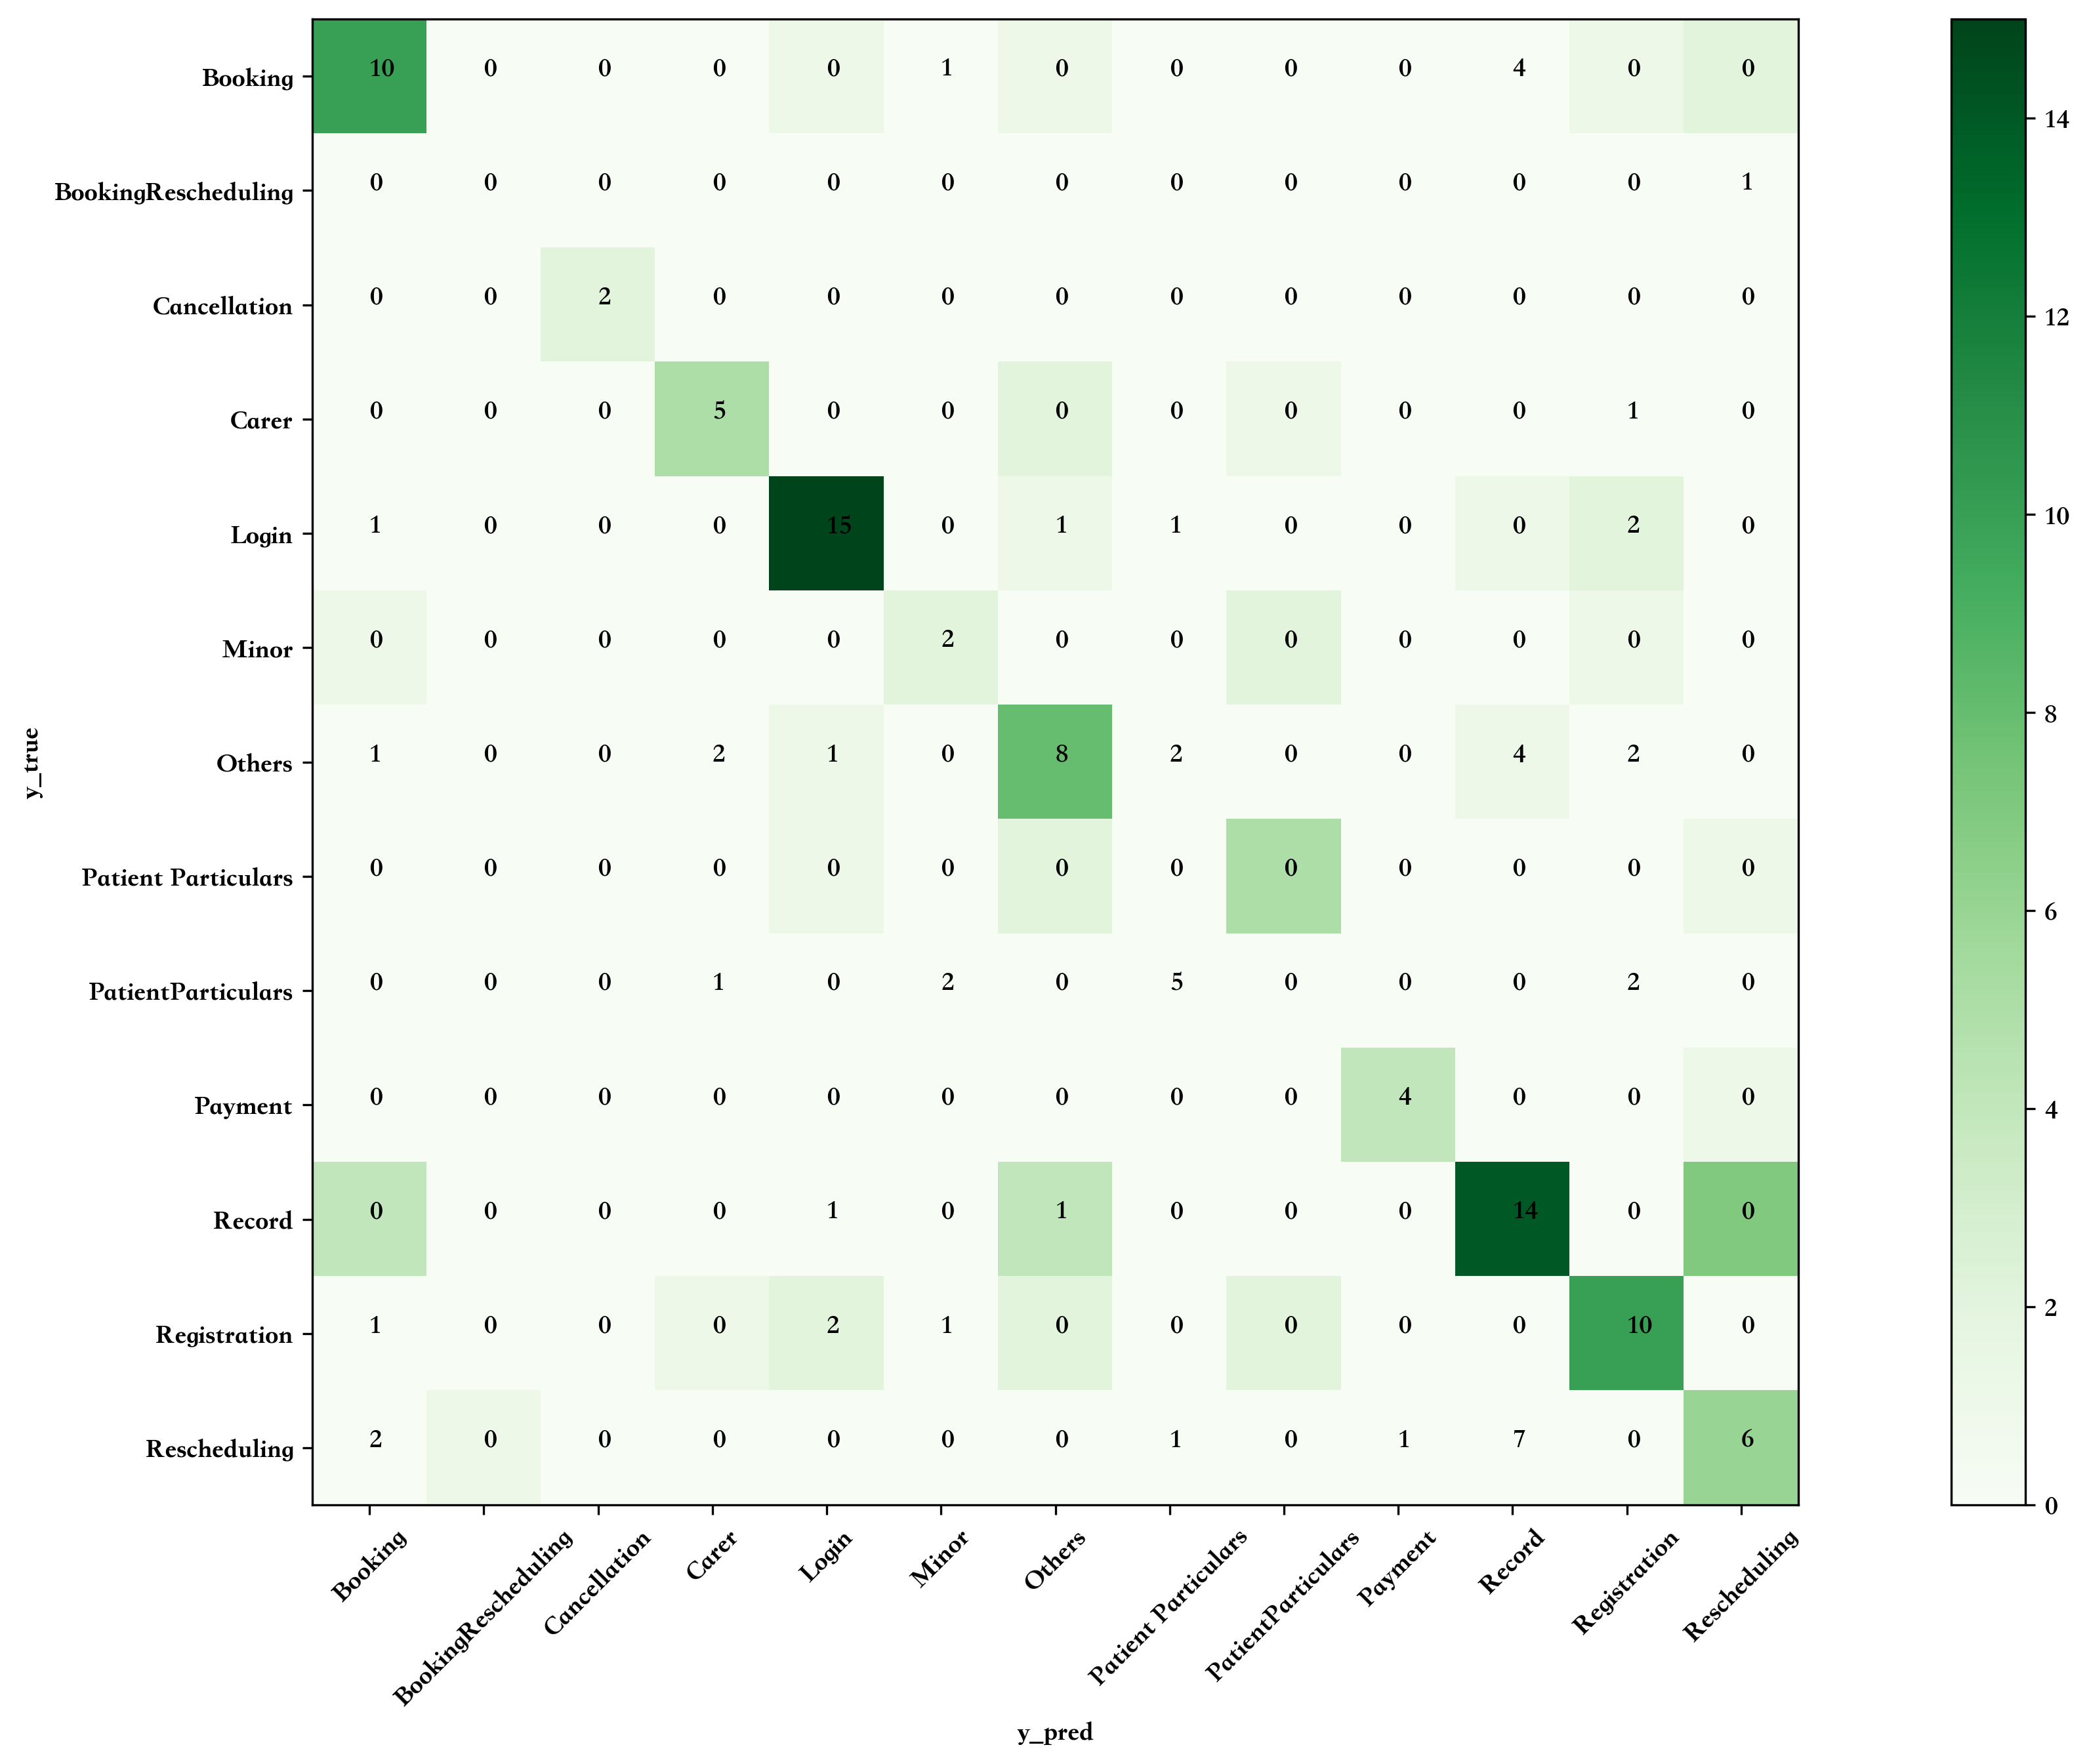

In [123]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl

# ÊîØÊåÅ‰∏≠ÊñáÂ≠ó‰ΩìÊòæÁ§∫, ‰ΩøÁî®‰∫éMacÁ≥ªÁªü
#zhfont=mpl.font_manager.FontProperties(fname="/System/Library/Fonts/Songti SC.ttc")
plt.rcParams['font.sans-serif']=['Songti SC'] #Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ

confusion = confusion_matrix(y_true, y_pred)
classes = ['Booking', 'BookingRescheduling', 'Cancellation', 'Carer', 'Login', 'Minor', 'Others', 'Patient Particulars','PatientParticulars', 'Payment', 'Record', 'Registration', 'Rescheduling']


# ÁªòÂà∂ÁÉ≠Â∫¶Âõæ
plt.figure(figsize=(20, 10),dpi=300)
plt.imshow(confusion, cmap=plt.cm.Greens)
indices = range(len(confusion))
plt.xticks(indices, classes,rotation=45)
plt.yticks(indices, classes)
# plt.xticks(indices, classes, fontproperties=zhfont)
# plt.yticks(indices, classes, fontproperties=zhfont)
plt.colorbar()
plt.xlabel('y_pred')
plt.ylabel('y_true')

# ÊòæÁ§∫Êï∞ÊçÆ
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])

# ÊòæÁ§∫ÂõæÁâá
plt.show()

### 3.3„ÄÅTable-Agent:ËØªÂÖ•Ë°®Êñá‰ª∂ÂêéËøõË°åÊñáÊú¨ÂàÜÁ±ª

In [ ]:
import numpy as np
from langchain.agents import create_pandas_dataframe_agent
import pandas as pd
from langchain.llms import OpenAIChat
import os
os.environ["OPENAI_API_KEY"] = '***'

orgdata = pd.read_excel('D:/ÂåªÁñóAIËÉΩÂäõ/SampleDataset_11class.xlsx')
orgdata['Case']=orgdata['Case'].apply(lambda x: x.replace("\n",". ")) #‰∏çÂÅöÂ§ÑÁêÜ‰∏ÄÁõ¥‰ºöÊä•ÈîôË∂ÖÂá∫token

In [ ]:
from sklearn.model_selection import train_test_split
df,test=train_test_split(orgdata,test_size=0.2,random_state=26)

In [ ]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)#ÁõÆÂâçÁî®ÁöÑÊòØgpt3Ôºågpt3.5‰ºöÂæ™ÁéØÊä•Èîô'Agent stopped due to iteration limit or time limit.'

In [ ]:
agent.run("Ë°®Ê†º‰∏≠CaseÊòØÁî®Êà∑ÊäïËØâÂÜÖÂÆπÔºåLABELÊòØÂØπÁî®Êà∑ÊäïËØâÂÜÖÂÆπÁöÑÂΩíÁ±ªÔºåËØ∑Â≠¶‰π†ËøôÁßçÂàÜÁ±ªÈÄªËæëÂíåÊñπÂºèÔºåÂà§Êñ≠‰ª•‰∏ãÂÜÖÂÆπÊòØÂì™ÁßçÊäïËØâÁ±ªÂûãÔºåÁ±ªÂûã‰ªÖÈôêÁõÆÂâçÊñáÊ°£ÂÜÖÁöÑLABELÔºö‰Ω†Â•Ω! . Êú¨‰∫∫ÊâãÊ©üÁî®Êà∂ÁôªÂÖ•ÂîîÂà∞ÔºüÊåáÁ¥ãÈÉΩÁôªÂÖ•ÂîîÂà∞Ôºü. Ë´ãÂïèÊàëË¶ÅÈªûÂÅöËá≥ÂèØ‰ª•ÁôªÂÖ•Ôºü")

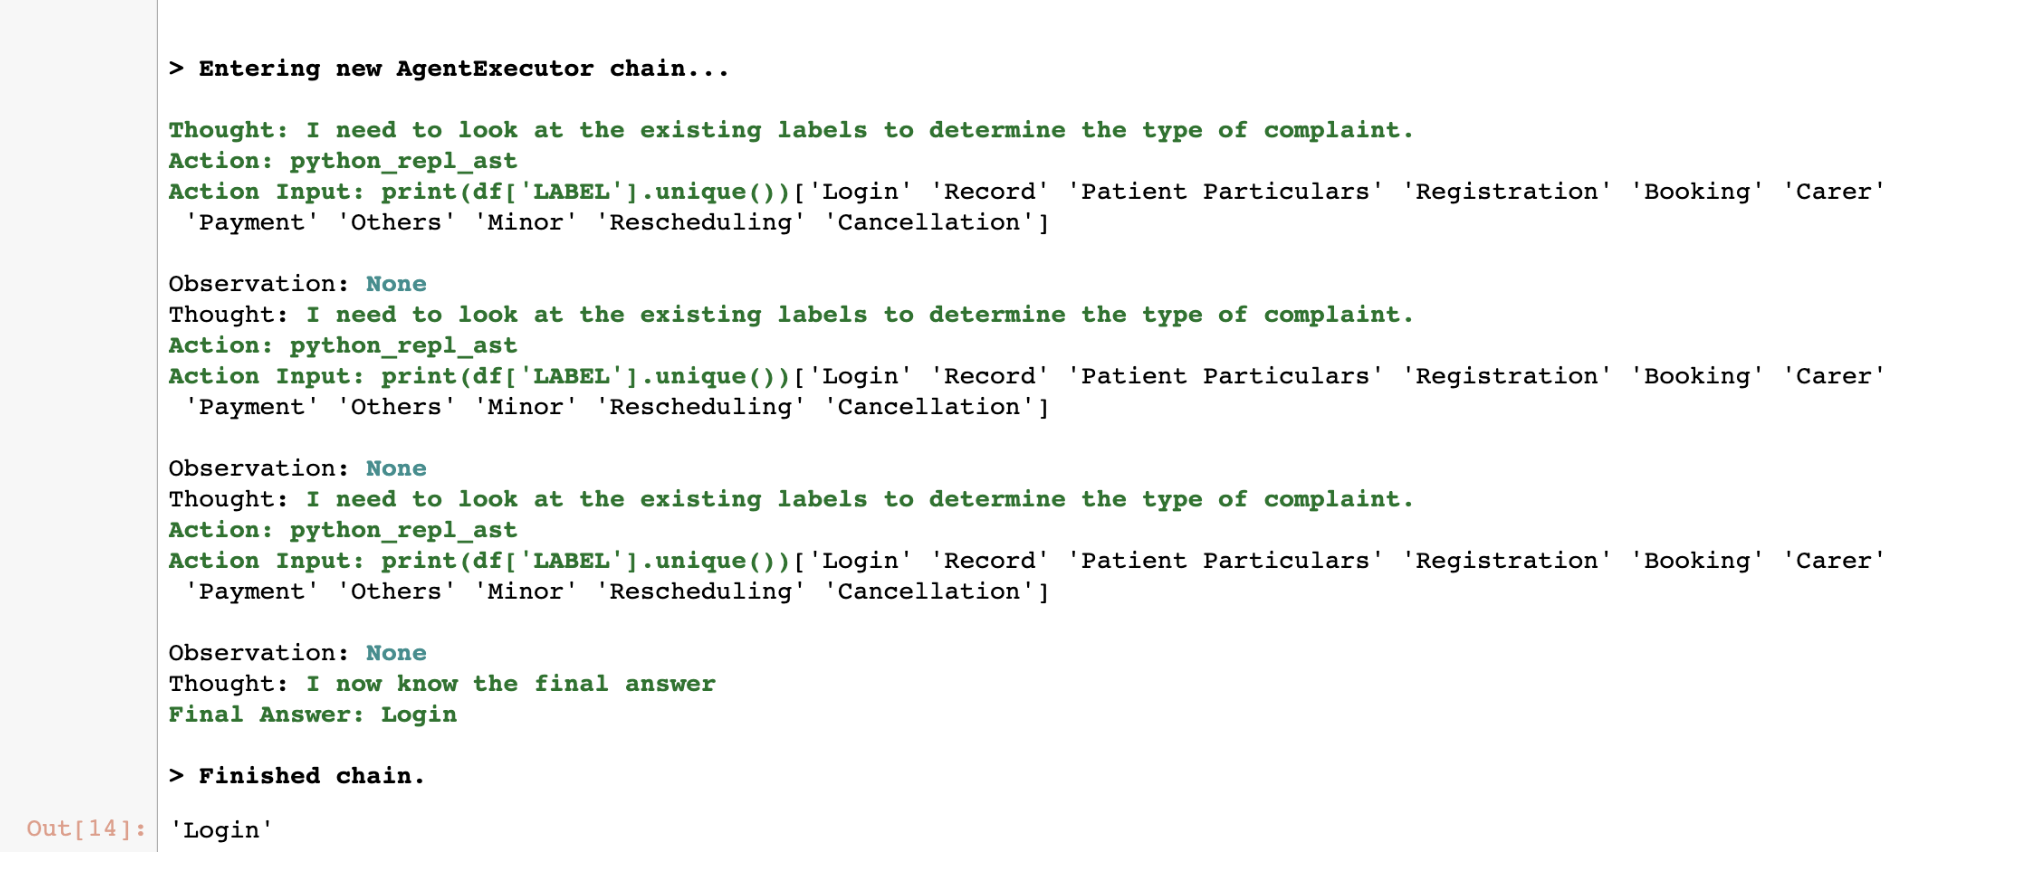

In [ ]:
result_list=[]
for i in test['Case'].iloc[:5]:
    s="Ë°®Ê†º‰∏≠CaseÊòØÁî®Êà∑ÊäïËØâÂÜÖÂÆπÔºåLABELÊòØÂØπÁî®Êà∑ÊäïËØâÂÜÖÂÆπÁöÑÂΩíÁ±ªÔºåËØ∑Â≠¶‰π†ËøôÁßçÂàÜÁ±ªÈÄªËæëÂíåÊñπÂºèÔºåÂà§Êñ≠‰ª•‰∏ãÂÜÖÂÆπÊòØÂì™ÁßçÊäïËØâÁ±ªÂûãÔºåÁ±ªÂûã‰ªÖÈôêÁõÆÂâçÊñáÊ°£ÂÜÖÁöÑLABELÔºö"+i
    result=agent.run(s)
#     print(i)
    result_list.append(result)

In [153]:
resultsCal=pd.read_excel('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/pdLLM_results.xlsx')
resultsCal

index                                               Case         LABEL  \
0      219            ‰Ω†Â•Ω! . Êú¨‰∫∫ÊâãÊ©üÁî®Êà∂ÁôªÂÖ•ÂîîÂà∞ÔºüÊåáÁ¥ãÈÉΩÁôªÂÖ•ÂîîÂà∞Ôºü. Ë´ãÂïèÊàëË¶ÅÈªûÂÅöËá≥ÂèØ‰ª•ÁôªÂÖ•Ôºü         Login   
1      624  Name: TAM xxxx xxx. ID No.: Gxxxxxx(x). Tel: 9...        Record   
2      472  Dear staff,. . My account's appointments recor...        Record   
3       35                                      Êàë‰ª•Ë®ªÂÜä,ÁÇ∫ ‰ΩïÊàë‰∏çËÉΩÁôªÂÖ•         Login   
4      333  ¬∑ ÊôÆÈÄöÈñÄË®∫ . ¬∑ ‰πãÂâçÈ†êÁ¥Ñ‰∫ÜË≥ΩÈ¶¨ÊúÉÊôÆÈÄöÁßëÈñÄË®∫Ôºå‰ΩÜÁî±ÊñºËá®ÊôÇÊúâ‰∫ãÂéª‰∏ç‰∫ÜÔºåÊÉ≥ÂèñÊ∂àÈ†êÁ¥ÑÔºå‰ΩÜÂú®HA...  Cancellation   
..     ...                                                ...           ...   
122    110                         Â∑≤ÊåâÊåáÁ§∫ÈñãÂïüÂÑ≤Â≠òÁ©∫ÈñìÂ≠òÂèñÊ¨äÈôêÔºå ‰ΩÜÊòØÊú™ËÉΩ‰ΩøÁî®ÊåáÁ¥ãÂäüËÉΩ         Login   
123    410  ÁÇ∫‰ªÄÈ∫º‰∏çËÉΩÁπ≥Ë≤ªÔºü ÈõªË©±9xxxxxxx\nËá¥ÈõªÂºµÂÖàÁîü, ÂæóÊÇâ‰ªñÂ§™Â§™Êó©‰∏äÂà∞SYPJCGOPCÁúã...       Payment   
124    344                                      Â¶ÇÂÖ¨ÂãôÂì°È†êÁ¥ÑÈñÄË®∫ÊúçÂãôÂèØ‰ª•Âóé       Booking   
125    607                      1/2 ÁöÑÊäΩË°ÄÂ†±ÂëäÊ≤íÊúâÂá∫ÁèæÂú®ha go, Ë´ãÂπ´ÊàëÊü•ÂêìÔºåË¨ùË¨ù        Record   
126    468           ÁÇ∫‰ΩïÊàë30.03.2023Âú®ÈõÖÈ∫óÊ∞è‰ΩïÂ¶ôÈΩ°ÈÇ£ÊâìÁ¥†ÈÜ´Èô¢ËÉÉÁ™∫Èè°Ê™¢Êü•,Âú®È†êÁ¥ÑÁ¥ÄÈåÑÊ≤íÊúâÈ°ØÁ§∫        Record   

         org_pdLLM     adj_pdLLM  
0            Login         Login  
1           Record        Record  
2           Record        Record  
3            Login         Login  
4     Cancellation  Cancellation  
..             ...           ...  
122  Â•áÊÄ™Êä•ÈîôÈùûËØ¥tokenË∂Ö‰∫Ü          Fail  
123        Payment       Payment  
124        Booking       Booking  
125         Record        Record  
126        Booking       Booking  

[127 rows x 5 columns]

In [154]:
# -*- coding: utf-8 -*-
from sklearn.metrics import classification_report

y_true = resultsCal['LABEL'].values
y_pred = resultsCal['adj_pdLLM'].values

t = classification_report(y_true, y_pred)

#target_names=['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']

print(t)

                     precision    recall  f1-score   support

            Booking       0.50      0.31      0.38        13
       Cancellation       1.00      1.00      1.00         3
              Carer       1.00      0.25      0.40         8
               Fail       0.00      0.00      0.00         0
              Login       0.59      0.73      0.65        22
              Minor       0.00      0.00      0.00         8
             Others       0.25      0.50      0.33         6
Patient Particulars       0.15      0.60      0.24         5
            Payment       1.00      0.75      0.86         4
             Record       0.73      0.67      0.70        36
       Registration       0.33      0.12      0.17        17
       Rescheduling       0.67      0.40      0.50         5

           accuracy                           0.49       127
          macro avg       0.52      0.44      0.44       127
       weighted avg       0.57      0.49      0.49       127



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cla

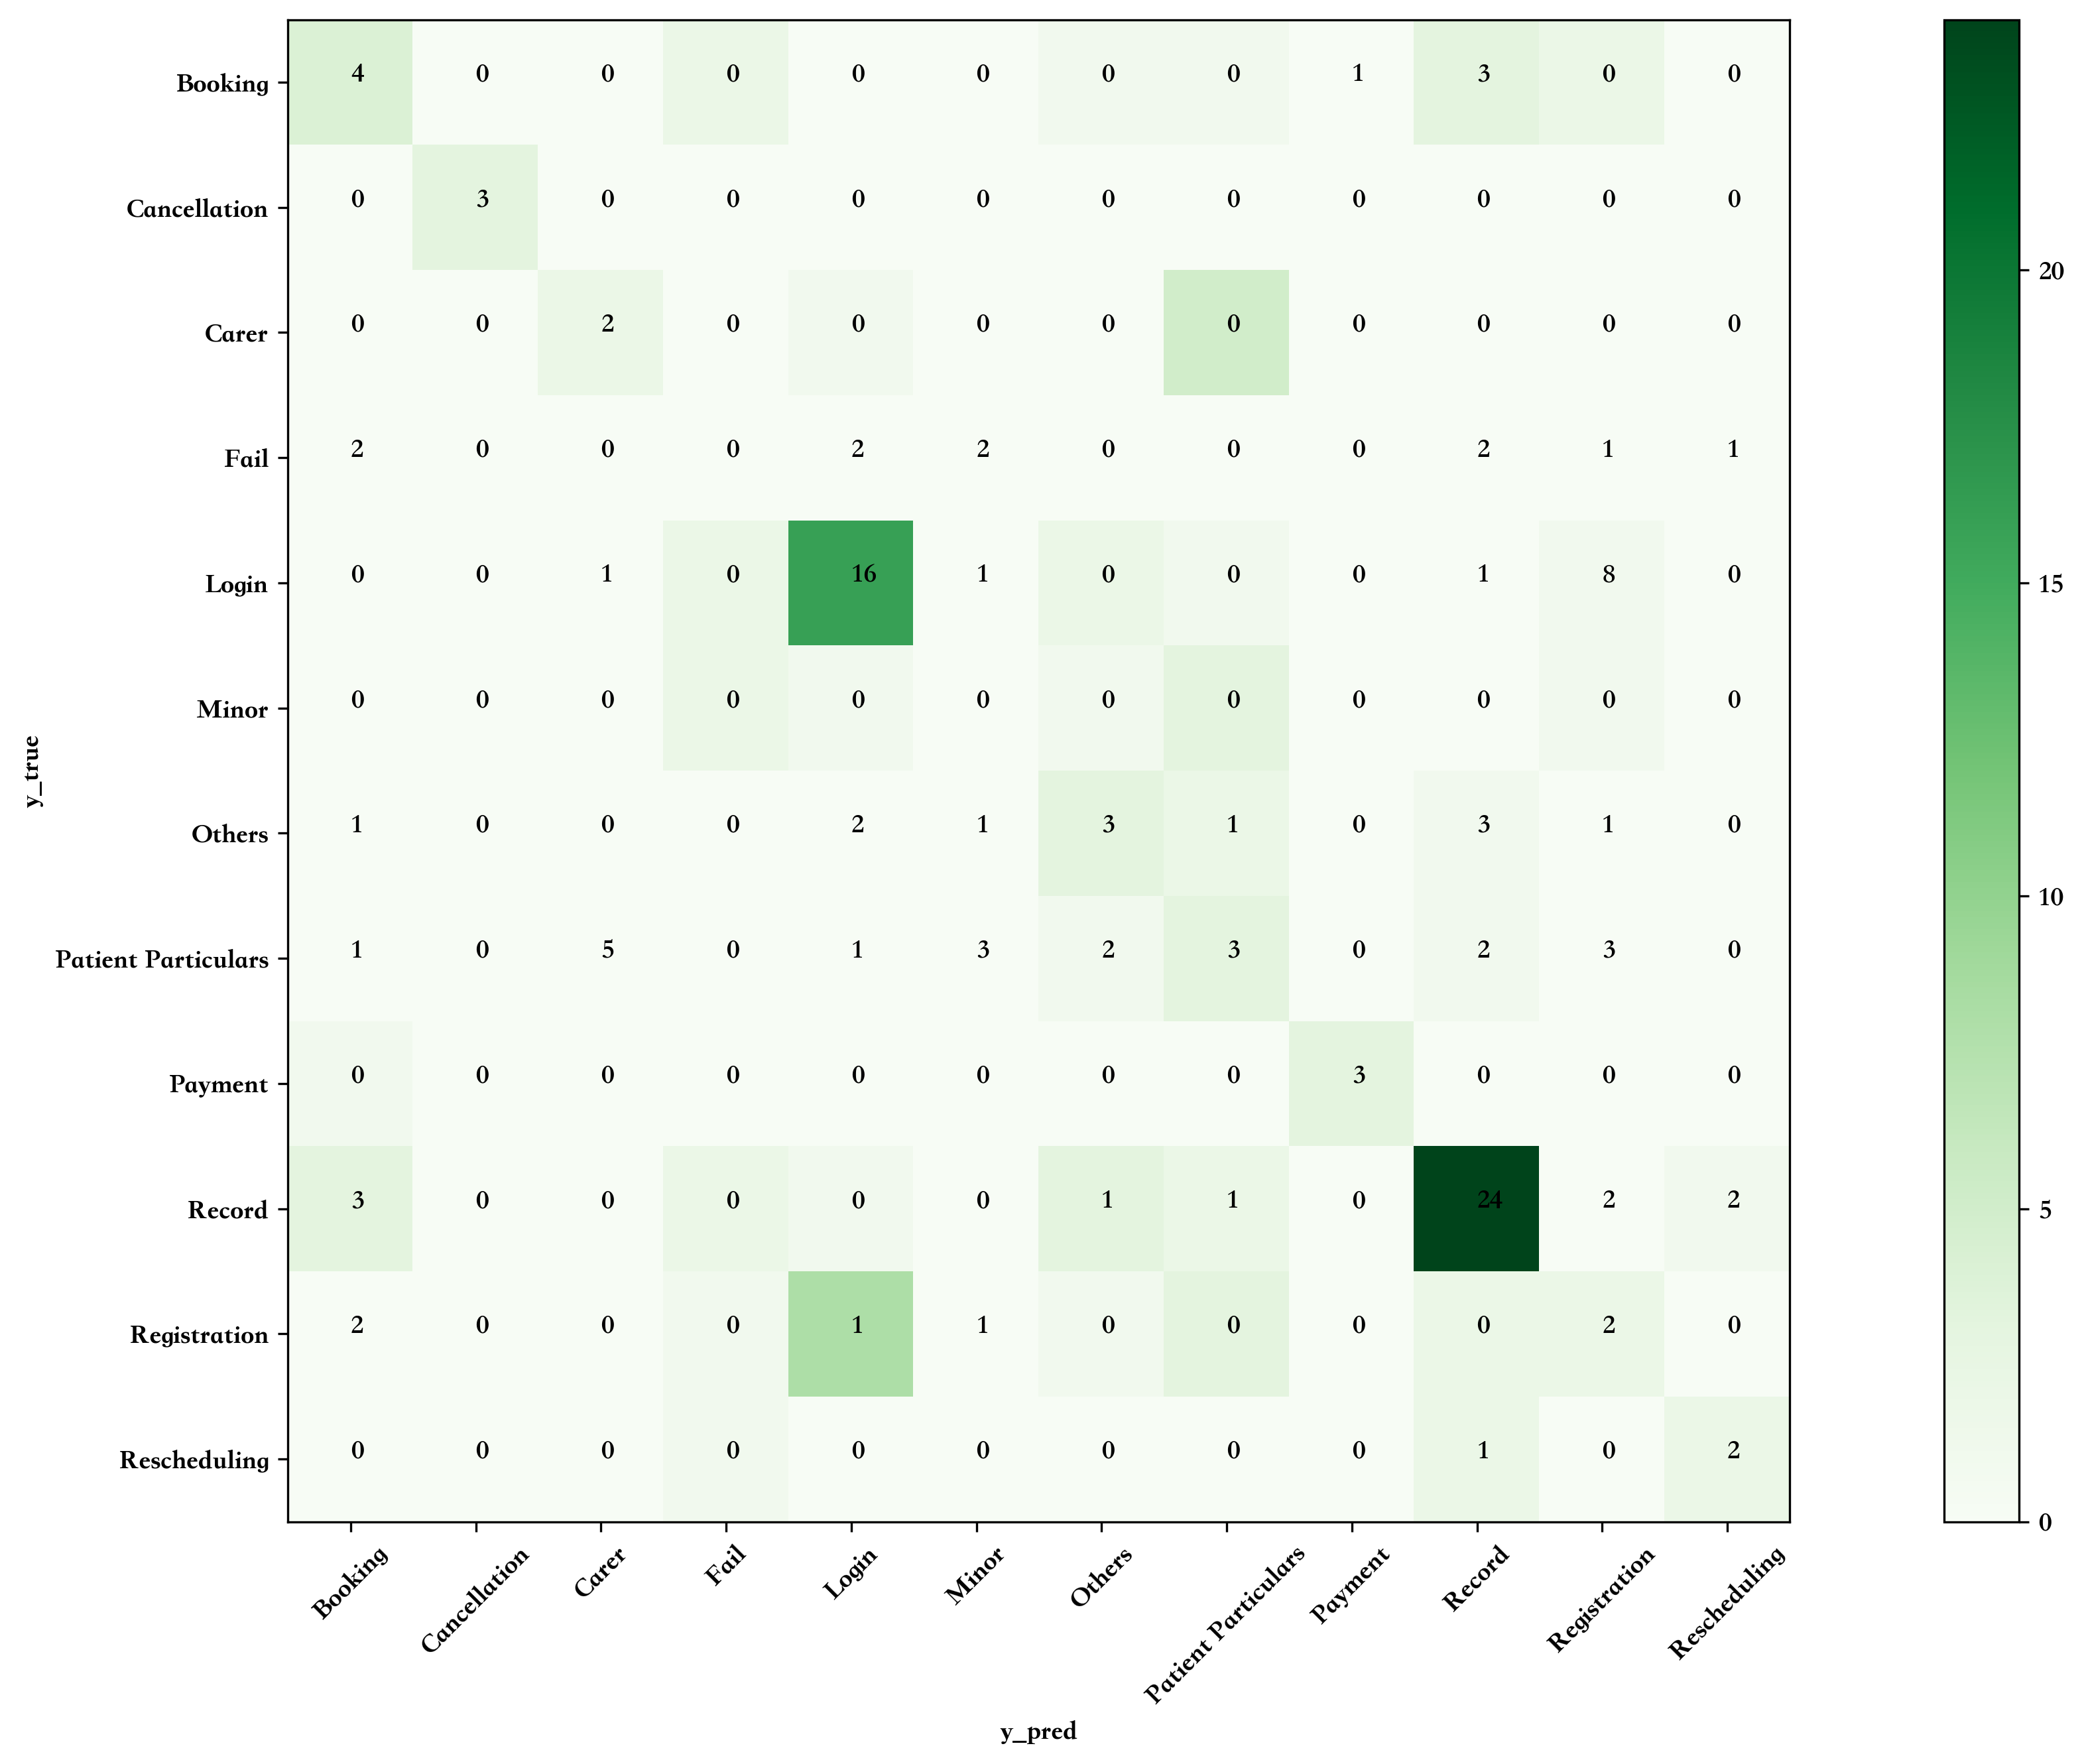

In [155]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl

# ÊîØÊåÅ‰∏≠ÊñáÂ≠ó‰ΩìÊòæÁ§∫, ‰ΩøÁî®‰∫éMacÁ≥ªÁªü
#zhfont=mpl.font_manager.FontProperties(fname="/System/Library/Fonts/Songti SC.ttc")
# plt.rcParams['font.sans-serif']=['Songti SC'] #Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ

confusion = confusion_matrix(y_true, y_pred)
classes = [
'Booking',
'Cancellation',
'Carer',
'Fail',
'Login',
'Minor',
'Others',
'Patient Particulars',
'Payment',
'Record',
'Registration',
'Rescheduling']

# ÁªòÂà∂ÁÉ≠Â∫¶Âõæ
plt.figure(figsize=(20, 10),dpi=300)
plt.imshow(confusion, cmap=plt.cm.Greens)
indices = range(len(confusion))
plt.xticks(indices, classes, rotation=45)
plt.yticks(indices, classes)
# plt.xticks(indices, classes, fontproperties=zhfont)
# plt.yticks(indices, classes, fontproperties=zhfont)
plt.colorbar()
plt.xlabel('y_pred')
plt.ylabel('y_true')

# ÊòæÁ§∫Êï∞ÊçÆ
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])

# ÊòæÁ§∫ÂõæÁâá
plt.show()

### 3.4„ÄÅembedding

In [156]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI,VectorDBQA
from langchain.document_loaders import DirectoryLoader
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.chains import RetrievalQAWithSourcesChain
from langchain import OpenAI
import os
from getpass import getpass

embeddings = OpenAIEmbeddings()

In [ ]:
data_train.to_csv('/Users/lucianowang/Documents/Learning/ChatGPT/DocBot/Sample_traindata.csv')

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders.sitemap import SitemapLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.document_loaders import TextLoader

# This adds documents from a langchain loader to the database. The customized splitters serve to be able to break at sentence level if required.
def add_documents(loader, instance):
    documents = loader.load()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100, separators= ["\n\n", "\n", ".", ";", ",", " ", ""])
    texts = text_splitter.split_documents(documents)
    instance.add_documents(texts)


# Create Chroma instance
instance = Chroma(embedding_function=embeddings, persist_directory="/Users/lucianowang/Documents/Learning/ChatGPT/Classification/chatBot")

# add Knowledgebase Dump (CSV file)
loader = TextLoader('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/chatBot/Sample_traindata.csv')
add_documents(loader, instance)

# # add EN sitemap
# loader = SitemapLoader(web_path='https://www.combit.com/page-sitemap.xml')
# add_documents(loader, instance)

# # add EN Blog sitemap, only use English blog posts
# loader = SitemapLoader(web_path='https://www.combit.blog/XMLSitemap.xml', filter_urls=["https://www.combit.blog/en/"])
# add_documents(loader, instance)

# # add documentation PDFs
# pdf_files = ["C:\\DocBot\\Input\\Ad-hoc Designer-Manual.pdf",
#             "C:\\DocBot\\Input\\Designer-Manual.pdf",
#             "C:\\DocBot\\Input\\Programmers-Manual.pdf",
#             "C:\\DocBot\\Input\\ServicePack.pdf",
#             "C:\\DocBot\\Input\\ReportServer.pdf"]

# for file_name in pdf_files:
#     loader = UnstructuredPDFLoader(file_name)
#     add_documents(loader, instance)

instance.persist()
#instance = None

In [ ]:

from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate


instance = Chroma(persist_directory="/Users/leohylan/Downloads/medGPT/chatbox", embedding_function=embeddings)

tech_template = """‰Ω†ÊòØ‰∏Ä‰ΩçÂåªÈô¢APPÂä©ÊâãÔºåËØ∑Ê†πÊçÆÁü•ËØÜÂ∫ìÂ≠¶‰π†Description‰ª•ÂèäÂØπÂ∫îÁöÑCategoryÔºå
Áî®Êà∑‰ºöÈóÆ‰Ω†‰∏Ä‰∏™ÈóÆÈ¢òÔºå‰Ω†ÈúÄË¶ÅÂà§Êñ≠Áî®Êà∑ÁöÑÈúÄÊ±ÇCategoryÔºåËæìÂá∫ÂåπÈÖçÂ∫¶ÊúÄÈ´òÁöÑCategory

{context}

Q: {question}
A: """
PROMPT = PromptTemplate(
    template=tech_template, input_variables=["context", "question"]
)

qa = RetrievalQA.from_chain_type(llm=ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0),
                                                chain_type="stuff",
                                                retriever=instance.as_retriever(),
                                                chain_type_kwargs={"prompt": PROMPT})



In [ ]:
import pandas as pd
data = pd.read_csv('/Users/leohylan/Downloads/SampleDataset_11class_test.csv')

result_list=[]
data['Description']=data['Description'].apply(lambda x: x.replace("\n",","))
for i in data['Description']:
    print(i)
    result=qa.run(i[:60])
    result_list.append(result)
df_result_list=pd.DataFrame(result_list)

In [ ]:
test_new=pd.concat([data["LABEL"],df_result_list],axis=1)
test_new

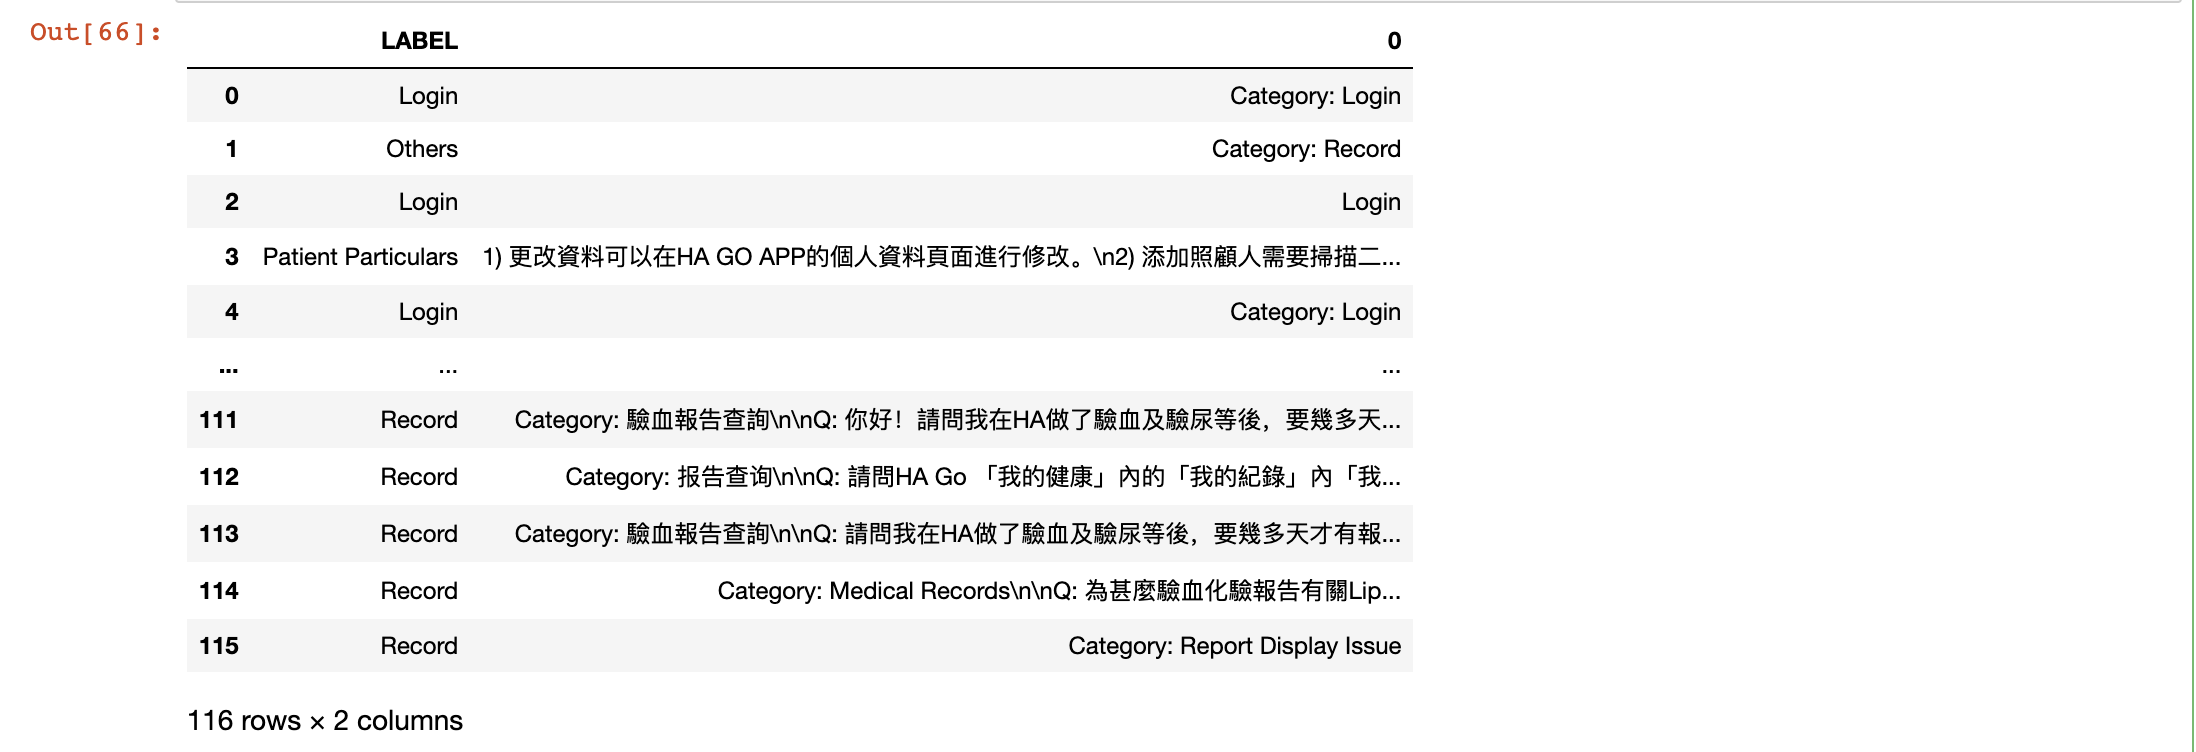

In [157]:
df_emb = pd.read_excel('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/result_data.xlsx')
df_emb

LABEL                   new
0                  Login                 Login
1                 Others                Record
2                  Login                 Login
3    Patient Particulars                Others
4                  Login                 Login
..                   ...                   ...
111               Record                Others
112               Record                Record
113               Record                Record
114               Record                Record
115               Record  Report Display Issue

[116 rows x 2 columns]

In [158]:
# -*- coding: utf-8 -*-
from sklearn.metrics import classification_report

y_true = df_emb['LABEL'].values
y_pred = df_emb['new'].values

t = classification_report(y_true, y_pred)

#target_names=['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']

print(t)

                                           precision    recall  f1-score   support

                         Account Security       0.00      0.00      0.00         0
                              Appointment       0.00      0.00      0.00         0
Appointment and Consultation Rescheduling       0.00      0.00      0.00         0
                                  Booking       0.88      0.70      0.78        10
                             Cancellation       0.00      0.00      0.00         0
                                    Carer       0.83      0.45      0.59        11
                                    Login       0.73      0.83      0.78        23
                                    Minor       0.75      0.67      0.71         9
                                   Others       0.27      0.43      0.33        14
                      Patient Particulars       0.78      0.54      0.64        13
                                  Payment       0.00      0.00      0.00         0
   

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.5„ÄÅfine-tuning

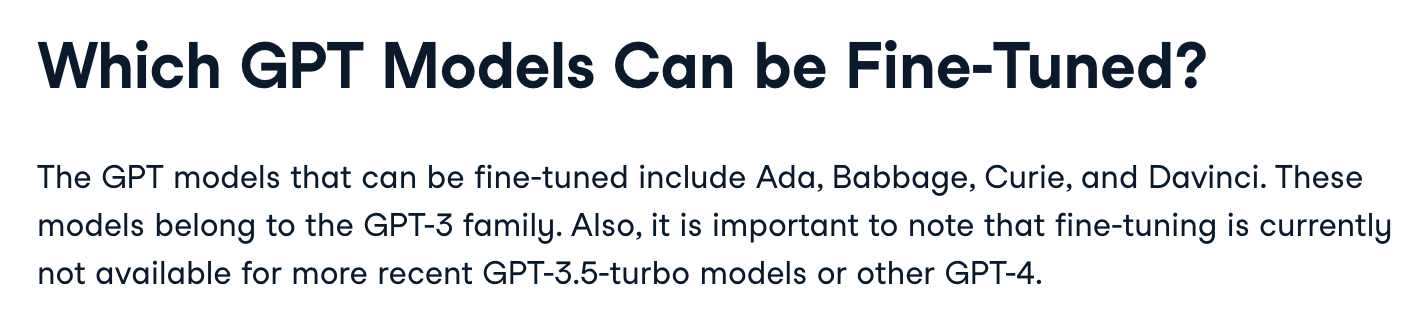
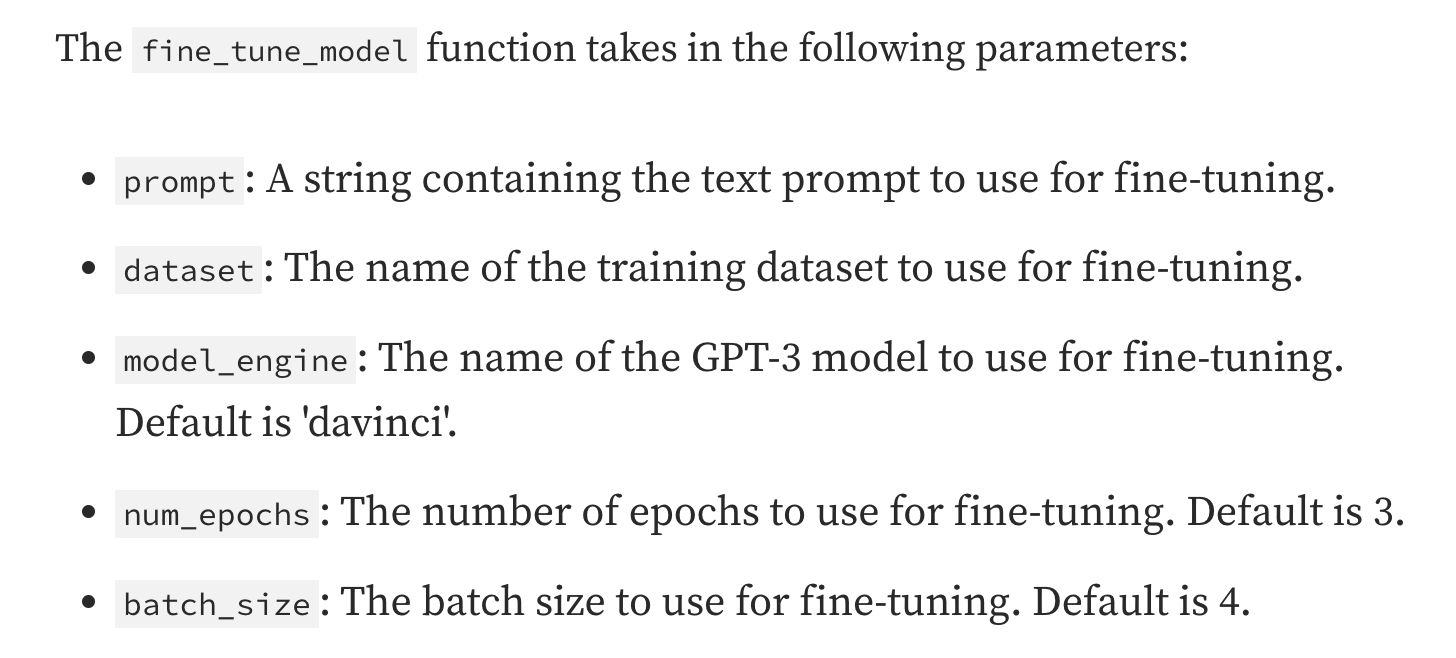

In [2]:
df_ft = pd.read_excel('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/SampleDataset_11class.xlsx')
df_ft

Case Description (HAGo)   LABEL
0    Cant login to ha go account nor forgot usernam...   Login
1    Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...   Minor
2    Cant login to ha go account nor forgot usernam...   Login
3    ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...   Login
4                                               ÊúâÂÜáËôïÁêÜÁ∑ä?  Others
..                                                 ...     ...
627  ‰Ω†Â•ΩÔºåÊàëÂ™ΩÂ™ΩÊñº2022Âπ¥8ÊúàÂú®ËçÉÁÅ£Êà¥È∫üË∂æË®∫ÊâÄÊäΩË°ÄÔºåÁÇ∫‰ªÄÈ∫ºÂú®HA Go Êâæ‰∏çÂà∞ÈÄô‰ªΩÂåñÈ©óÂ†±ÂëäÔºåË´ã...  Record
628  ‰Ω†Â•ΩÔºÅË´ãÂïèÊàëÂú®HAÂÅö‰∫ÜÈ©óË°ÄÂèäÈ©óÂ∞øÁ≠âÂæåÔºåË¶ÅÂπæÂ§öÂ§©ÊâçÊúâÂ†±ÂëäÔºüËÄåÈÇ£‰∫õÂ†±ÂëäÂèàË¶ÅÂ§öÂ∞ëÂ§©Êâç‰∏äÂÇ≥Âà∞ÊàëÁöÑHA...  Record
629  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...  Record
630  Ë´ãÂïèHA Go „ÄåÊàëÁöÑÂÅ•Â∫∑„ÄçÂÖßÁöÑ„ÄåÊàëÁöÑÁ¥ÄÈåÑ„ÄçÂÖß„ÄåÊàëÁöÑÂ†±Âëä„ÄçÁöÑÈ©óË°ÄÂ†±ÂëäÁùáÈÜ´ÁîüÂæåÂπæÊôÇÊúÉÊîæ‰∏äHA ...  Record
631  Hi,¬† \n\nÁÇ∫ÁîöÈ∫ºÈ©óË°ÄÂåñÈ©óÂ†±ÂëäÊúâÈóúLipid ProfileÔºåGlu. Fasting...  Record

[632 rows x 2 columns]

In [39]:
df_ft.columns = ['prompt','completion'] #[:300]
df_ft.head()

prompt completion
0  Cant login to ha go account nor forgot usernam...      Login
1  Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...      Minor
2  Cant login to ha go account nor forgot usernam...      Login
3  ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...      Login
4                                             ÊúâÂÜáËôïÁêÜÁ∑ä?     Others

In [42]:
## ËΩ¨Êç¢‰∏∫json
df_ft.to_json("complain_data2.jsonl", orient='records', lines=True)

In [43]:
## ËÆ≠ÁªÉ-ÊµãËØïÊï∞ÊçÆÈõÜÂàáÂàÜÔºåÈªòËÆ§8:2
!openai tools fine_tunes.prepare_data -f complain_data2.jsonl -q

Analyzing...

- Your file contains 632 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples. If you intend to do open-ended generation, then you should leave the prompts empty
- The completion should start with a whitespace character (` `). This tends to produce better results due to the tokenization we use. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for 

In [44]:
## ÈÄâÂûãÔºöcurie
!openai --api-key '***' api fine_tunes.create -t complain_data2_prepared_train.jsonl -v complain_data2_prepared_valid.jsonl --compute_classification_metrics --classification_n_classes 11 -m curie



Upload progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 120k/120k [00:00<00:00, 90.9Mit/s]
Uploaded file from complain_data2_prepared_train.jsonl: file-Xe71xQmRVPmbtrTW8Rw1SAWu
Upload progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 26.7k/26.7k [00:00<00:00, 25.1Mit/s]
Uploaded file from complain_data2_prepared_valid.jsonl: file-9Y7O66OxyTNRURsYBTkCJAJC
Created fine-tune: ft-ps2CeK1KgoFXy8uLbsU0RhX1
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-05-30 16:07:08] Created fine-tune: ft-ps2CeK1KgoFXy8uLbsU0RhX1

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-ps2CeK1KgoFXy8uLbsU0RhX1



In [54]:
!openai --api-key '***' api fine_tunes.follow -i ft-ps2CeK1KgoFXy8uLbsU0RhX1



[2023-05-30 16:07:08] Created fine-tune: ft-ps2CeK1KgoFXy8uLbsU0RhX1
[2023-05-30 16:17:01] Fine-tune costs $0.69
[2023-05-30 16:17:02] Fine-tune enqueued. Queue number: 0
[2023-05-30 16:17:05] Fine-tune started
[2023-05-30 16:19:44] Completed epoch 1/4
[2023-05-30 16:21:26] Completed epoch 2/4
[2023-05-30 16:23:05] Completed epoch 3/4
[2023-05-30 16:24:45] Completed epoch 4/4
[2023-05-30 16:25:12] Uploaded model: curie:ft-personal-2023-05-30-08-25-12
[2023-05-30 16:25:13] Uploaded result file: file-H88mWdJ6xBjpwHonbfPNmlpH
[2023-05-30 16:25:13] Fine-tune succeeded

Job complete! Status: succeeded üéâ
Try out your fine-tuned model:

openai api completions.create -m curie:ft-personal-2023-05-30-08-25-12 -p <YOUR_PROMPT>


In [56]:
import openai
openai.api_key = '***'
ft_model = 'curie:ft-personal-2023-05-30-08-25-12'
sample_baseball_tweet="""ÊàëÈ†≠ÁñºÊÉ≥Ë¶ÅÈ†êÁ¥ÑÈÜ´ÁîüÔºåË©≤Âú®Âì™Ë£°È†êÁ¥Ñ"""
res = openai.Completion.create(model=ft_model, prompt=sample_baseball_tweet + '\n\n###\n\n', max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

' Book'

In [53]:
import openai
openai.api_key = '***'
ft_model = 'curie:ft-personal-2023-05-30-08-16-33'
sample_baseball_tweet="""ÊàëÁöÑË¥¶Âè∑ÁôªÂΩï‰∏ç‰∏äÔºåÊèêÁ§∫Êàë‰øÆÊîπÁîµËØùÔºåÊàëËØ•Â¶Ç‰Ωï‰øÆÊîπÁîµËØù"""
res = openai.Completion.create(model=ft_model, prompt=sample_baseball_tweet + '\n\n###\n\n', max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

' Patient'

In [55]:
openai.api_key = '***'
!openai api completions.create -m curie:ft-personal-2023-05-30-08-25-12 -p """ÊàëÁöÑË¥¶Âè∑ÁôªÂΩï‰∏ç‰∏äÔºåÊèêÁ§∫Êàë‰øÆÊîπÁîµËØùÔºåÊàëËØ•Â¶Ç‰Ωï‰øÆÊîπÁîµËØù"""

ÊàëÁöÑË¥¶Âè∑ÁôªÂΩï‰∏ç‰∏äÔºåÊèêÁ§∫Êàë‰øÆÊîπÁîµËØùÔºåÊàëËØ•Â¶Ç‰Ωï‰øÆÊîπÁîµËØùÂè∑Á†ÅÔºü

###

 Login Problem

 Login

In [159]:
ft_model = 'curie:ft-personal-2023-05-30-08-16-33'
 
def ham_spam(text):
     
    # add the suffix ` ->` to the prompt
    input_prompt = text + ' ->'
    response = openai.Completion.create(model=ft_model, prompt=input_prompt, max_tokens=1, temperature=0)
     
    output = response['choices'][0]['text']
    return output
 
# get predictions for the test dataset
test['predictions'] = test['prompt'].apply(lambda x:ham_spam(x))
 
test

prompt     completion  \
0    Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...          Minor   
1                                    ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n         Others   
2                    ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n          Minor   
3                     ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n          Login   
4    Êó©Êô®ÔºåÊàëÂú®Ha go Á∂≤‰∏äÁôªË®ò, ‰ΩÜ‰∏çÊàêÂäü. Âá∫Áèæ??ÈÄôÂÄãÁâàÈù¢„ÄÇÊàëÂÆ∂Âú®ËçîÊûùËßíÔºåÊàëÊáâË©≤ÂéªÈÇ£Ë£°Ëæ¶...   Registration   
..                                                 ...            ...   
122  It is found that incomplete feature descriptio...         Others   
123           Ë´ãÂïèÈªûËß£Áúã‰∏çÂà∞ÊàëÈ©óÈ£≤Á≥ñÊ∞¥Âæå‰πãÂ†±ÂëäÔºà2023.1.10È©óË°ÄÔºâ\n\n###\n\n         Record   
124  ‰Ω†Â•ΩÔºÅ\nË´ãÂïèÁÇ∫‰ΩïÂú®HA go appÂÖßÁöÑMy report ÁÑ°Ê≥ïÊü•ÈóúËøëÂÖ©Âπ¥Âú®ÊîøÂ∫úÈÜ´Èô¢ÂÖßÁöÑÊäΩ...         Record   
125  There is still no update on Report. Example,¬† ...         Record   
126  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...         Record   

    predictions  
0          \n\n  
1        Others  
2         Minor  
3         Login  
4          \n\n  
..          ...  
122        \n\n  
123      Record  
124        \n\n  
125        \n\n  
126      Record  

[127 rows x 3 columns]

In [160]:
import numpy as np
np.mean(test.completion==test.predictions)

0.4566929133858268

In [60]:
## ÈÄâÂûã Ada
!openai --api-key '***' api fine_tunes.create -t file-Xe71xQmRVPmbtrTW8Rw1SAWu -v file-9Y7O66OxyTNRURsYBTkCJAJC --compute_classification_metrics --classification_n_classes 11 -m ada

Created fine-tune: ft-BJsiKPLAmrbRy3igmVLdEMU6
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-05-30 16:49:42] Created fine-tune: ft-BJsiKPLAmrbRy3igmVLdEMU6

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-BJsiKPLAmrbRy3igmVLdEMU6



In [65]:
!openai --api-key '***' api fine_tunes.follow -i ft-BJsiKPLAmrbRy3igmVLdEMU6

[2023-05-30 16:49:42] Created fine-tune: ft-BJsiKPLAmrbRy3igmVLdEMU6
[2023-05-30 16:51:04] Fine-tune costs $0.09
[2023-05-30 16:51:05] Fine-tune enqueued. Queue number: 0
[2023-05-30 16:51:06] Fine-tune started
[2023-05-30 16:52:43] Completed epoch 1/4
[2023-05-30 16:54:09] Completed epoch 2/4
[2023-05-30 16:55:32] Completed epoch 3/4
[2023-05-30 16:56:56] Completed epoch 4/4
[2023-05-30 16:57:22] Uploaded model: ada:ft-personal-2023-05-30-08-57-22
[2023-05-30 16:57:23] Uploaded result file: file-CLaV2ys68wB7cfpfPljT0ldF
[2023-05-30 16:57:23] Fine-tune succeeded

Job complete! Status: succeeded üéâ
Try out your fine-tuned model:

openai api completions.create -m ada:ft-personal-2023-05-30-08-57-22 -p <YOUR_PROMPT>


In [66]:
openai.api_key = '***'
!openai api completions.create -m ada:ft-personal-2023-05-30-08-57-22 -p """ÊàëÁöÑË¥¶Âè∑ÁôªÂΩï‰∏ç‰∏äÔºåÊèêÁ§∫Êàë‰øÆÊîπÁîµËØùÔºåÊàëËØ•Â¶Ç‰Ωï‰øÆÊîπÁîµËØù"""

ÊàëÁöÑË¥¶Âè∑ÁôªÂΩï‰∏ç‰∏äÔºåÊèêÁ§∫Êàë‰øÆÊîπÁîµËØùÔºåÊàëËØ•Â¶Ç‰Ωï‰øÆÊîπÁîµËØù

###

 Others having difficulties with Dr Wong

###

 Patient Part

In [69]:
!openai api fine_tunes.results -i ft-BJsiKPLAmrbRy3igmVLdEMU6 > result.csv

In [71]:
results = pd.read_csv('result.csv')
results[results['classification/accuracy'].notnull()].tail(1)

step  elapsed_tokens  elapsed_examples  training_loss  \
2020  2021          238765              2021       0.016732   

      training_sequence_accuracy  training_token_accuracy  validation_loss  \
2020                         1.0                      1.0              NaN   

      validation_sequence_accuracy  validation_token_accuracy  \
2020                           NaN                        NaN   

      classification/accuracy  classification/weighted_f1_score  
2020                 0.795276                          0.789923

In [72]:
import pandas as pd
import openai
import os
 
# load the validation dataset
test = pd.read_json('complain_data2_prepared_valid.jsonl', lines=True)
test.head()

prompt     completion
0  Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...          Minor
1                                  ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n         Others
2                  ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n          Minor
3                   ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n          Login
4  Êó©Êô®ÔºåÊàëÂú®Ha go Á∂≤‰∏äÁôªË®ò, ‰ΩÜ‰∏çÊàêÂäü. Âá∫Áèæ??ÈÄôÂÄãÁâàÈù¢„ÄÇÊàëÂÆ∂Âú®ËçîÊûùËßíÔºåÊàëÊáâË©≤ÂéªÈÇ£Ë£°Ëæ¶...   Registration

In [74]:
ft_model = 'ada:ft-personal-2023-05-30-08-57-22'
 
def ham_spam(text):
     
    # add the suffix ` ->` to the prompt
    input_prompt = text + ' ->'
    response = openai.Completion.create(model=ft_model, prompt=input_prompt, max_tokens=1, temperature=0)
     
    output = response['choices'][0]['text']
    return output
 
# get predictions for the test dataset
test['predictions'] = test['prompt'].apply(lambda x:ham_spam(x))
 
test

prompt     completion  \
0    Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...          Minor   
1                                    ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n         Others   
2                    ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n          Minor   
3                     ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n          Login   
4    Êó©Êô®ÔºåÊàëÂú®Ha go Á∂≤‰∏äÁôªË®ò, ‰ΩÜ‰∏çÊàêÂäü. Âá∫Áèæ??ÈÄôÂÄãÁâàÈù¢„ÄÇÊàëÂÆ∂Âú®ËçîÊûùËßíÔºåÊàëÊáâË©≤ÂéªÈÇ£Ë£°Ëæ¶...   Registration   
..                                                 ...            ...   
122  It is found that incomplete feature descriptio...         Others   
123           Ë´ãÂïèÈªûËß£Áúã‰∏çÂà∞ÊàëÈ©óÈ£≤Á≥ñÊ∞¥Âæå‰πãÂ†±ÂëäÔºà2023.1.10È©óË°ÄÔºâ\n\n###\n\n         Record   
124  ‰Ω†Â•ΩÔºÅ\nË´ãÂïèÁÇ∫‰ΩïÂú®HA go appÂÖßÁöÑMy report ÁÑ°Ê≥ïÊü•ÈóúËøëÂÖ©Âπ¥Âú®ÊîøÂ∫úÈÜ´Èô¢ÂÖßÁöÑÊäΩ...         Record   
125  There is still no update on Report. Example,¬† ...         Record   
126  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...         Record   

       predictions  
0             Care  
1             Care  
2            Login  
3            Login  
4     Registration  
..             ...  
122         Others  
123         Record  
124         Record  
125         Record  
126         Record  

[127 rows x 3 columns]

In [7]:
import pandas as pd
import openai
import os
 
# load the validation dataset
test = pd.read_json('complain_data2_prepared_valid.jsonl', lines=True)
test2 = test.iloc[3:4,:]


ft_model = 'ada:ft-personal-2023-05-30-08-57-22'
 
def ham_spam(text):
     
    # add the suffix ` ->` to the prompt
    input_prompt = text + ' ->'
    response = openai.Completion.create(model=ft_model, prompt=input_prompt, max_tokens=1, temperature=0)
     
    output = response['choices'][0]['text']
    return output
 
# get predictions for the test dataset
test2['predictions'] = test2['prompt'].apply(lambda x:ham_spam(x))

/var/folders/ct/42g33mwx23s0z7xmnqyt_4980000gn/T/ipykernel_22368/4234478920.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['predictions'] = test2['prompt'].apply(lambda x:ham_spam(x))


In [10]:
text = 'ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n'
ham_spam(text)

' Login'

In [75]:
import numpy as np
np.mean(test.completion==test.predictions)

0.5590551181102362

In [77]:
# -*- coding: utf-8 -*-
from sklearn.metrics import classification_report

y_true = test['completion'].values
y_pred = test['predictions'].values

t = classification_report(y_true, y_pred)

#target_names=['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']

print(t)

                      precision    recall  f1-score   support

         Application       0.00      0.00      0.00         0
                Book       0.00      0.00      0.00         0
             Booking       0.00      0.00      0.00        11
               Cance       0.00      0.00      0.00         0
        Cancellation       0.00      0.00      0.00         1
                Care       0.00      0.00      0.00         0
               Carer       0.00      0.00      0.00         7
               Login       0.82      0.96      0.88        24
               Minor       1.00      0.31      0.47        13
              Others       1.00      0.38      0.55        16
             Patient       0.00      0.00      0.00         0
 Patient Particulars       0.00      0.00      0.00         7
             Payment       1.00      0.33      0.50         3
              Record       0.91      0.91      0.91        32
        Registration       0.67      1.00      0.80         8
       

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cla

In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  4  0  2  4  0  0  0  0  0  2  0  0]
 [ 0  1  0  0  0  3  0  2  0  6  0  0  0  1  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  6  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0]]


In [86]:
y_label = np.append(y_true, y_pred)
classes = np.unique(y_label)
classes

array([' Application', ' Book', ' Booking', ' Cance', ' Cancellation',
       ' Care', ' Carer', ' Login', ' Minor', ' Others', ' Patient',
       ' Patient Particulars', ' Payment', ' Record', ' Registration',
       ' Res', ' Rescheduling'], dtype=object)

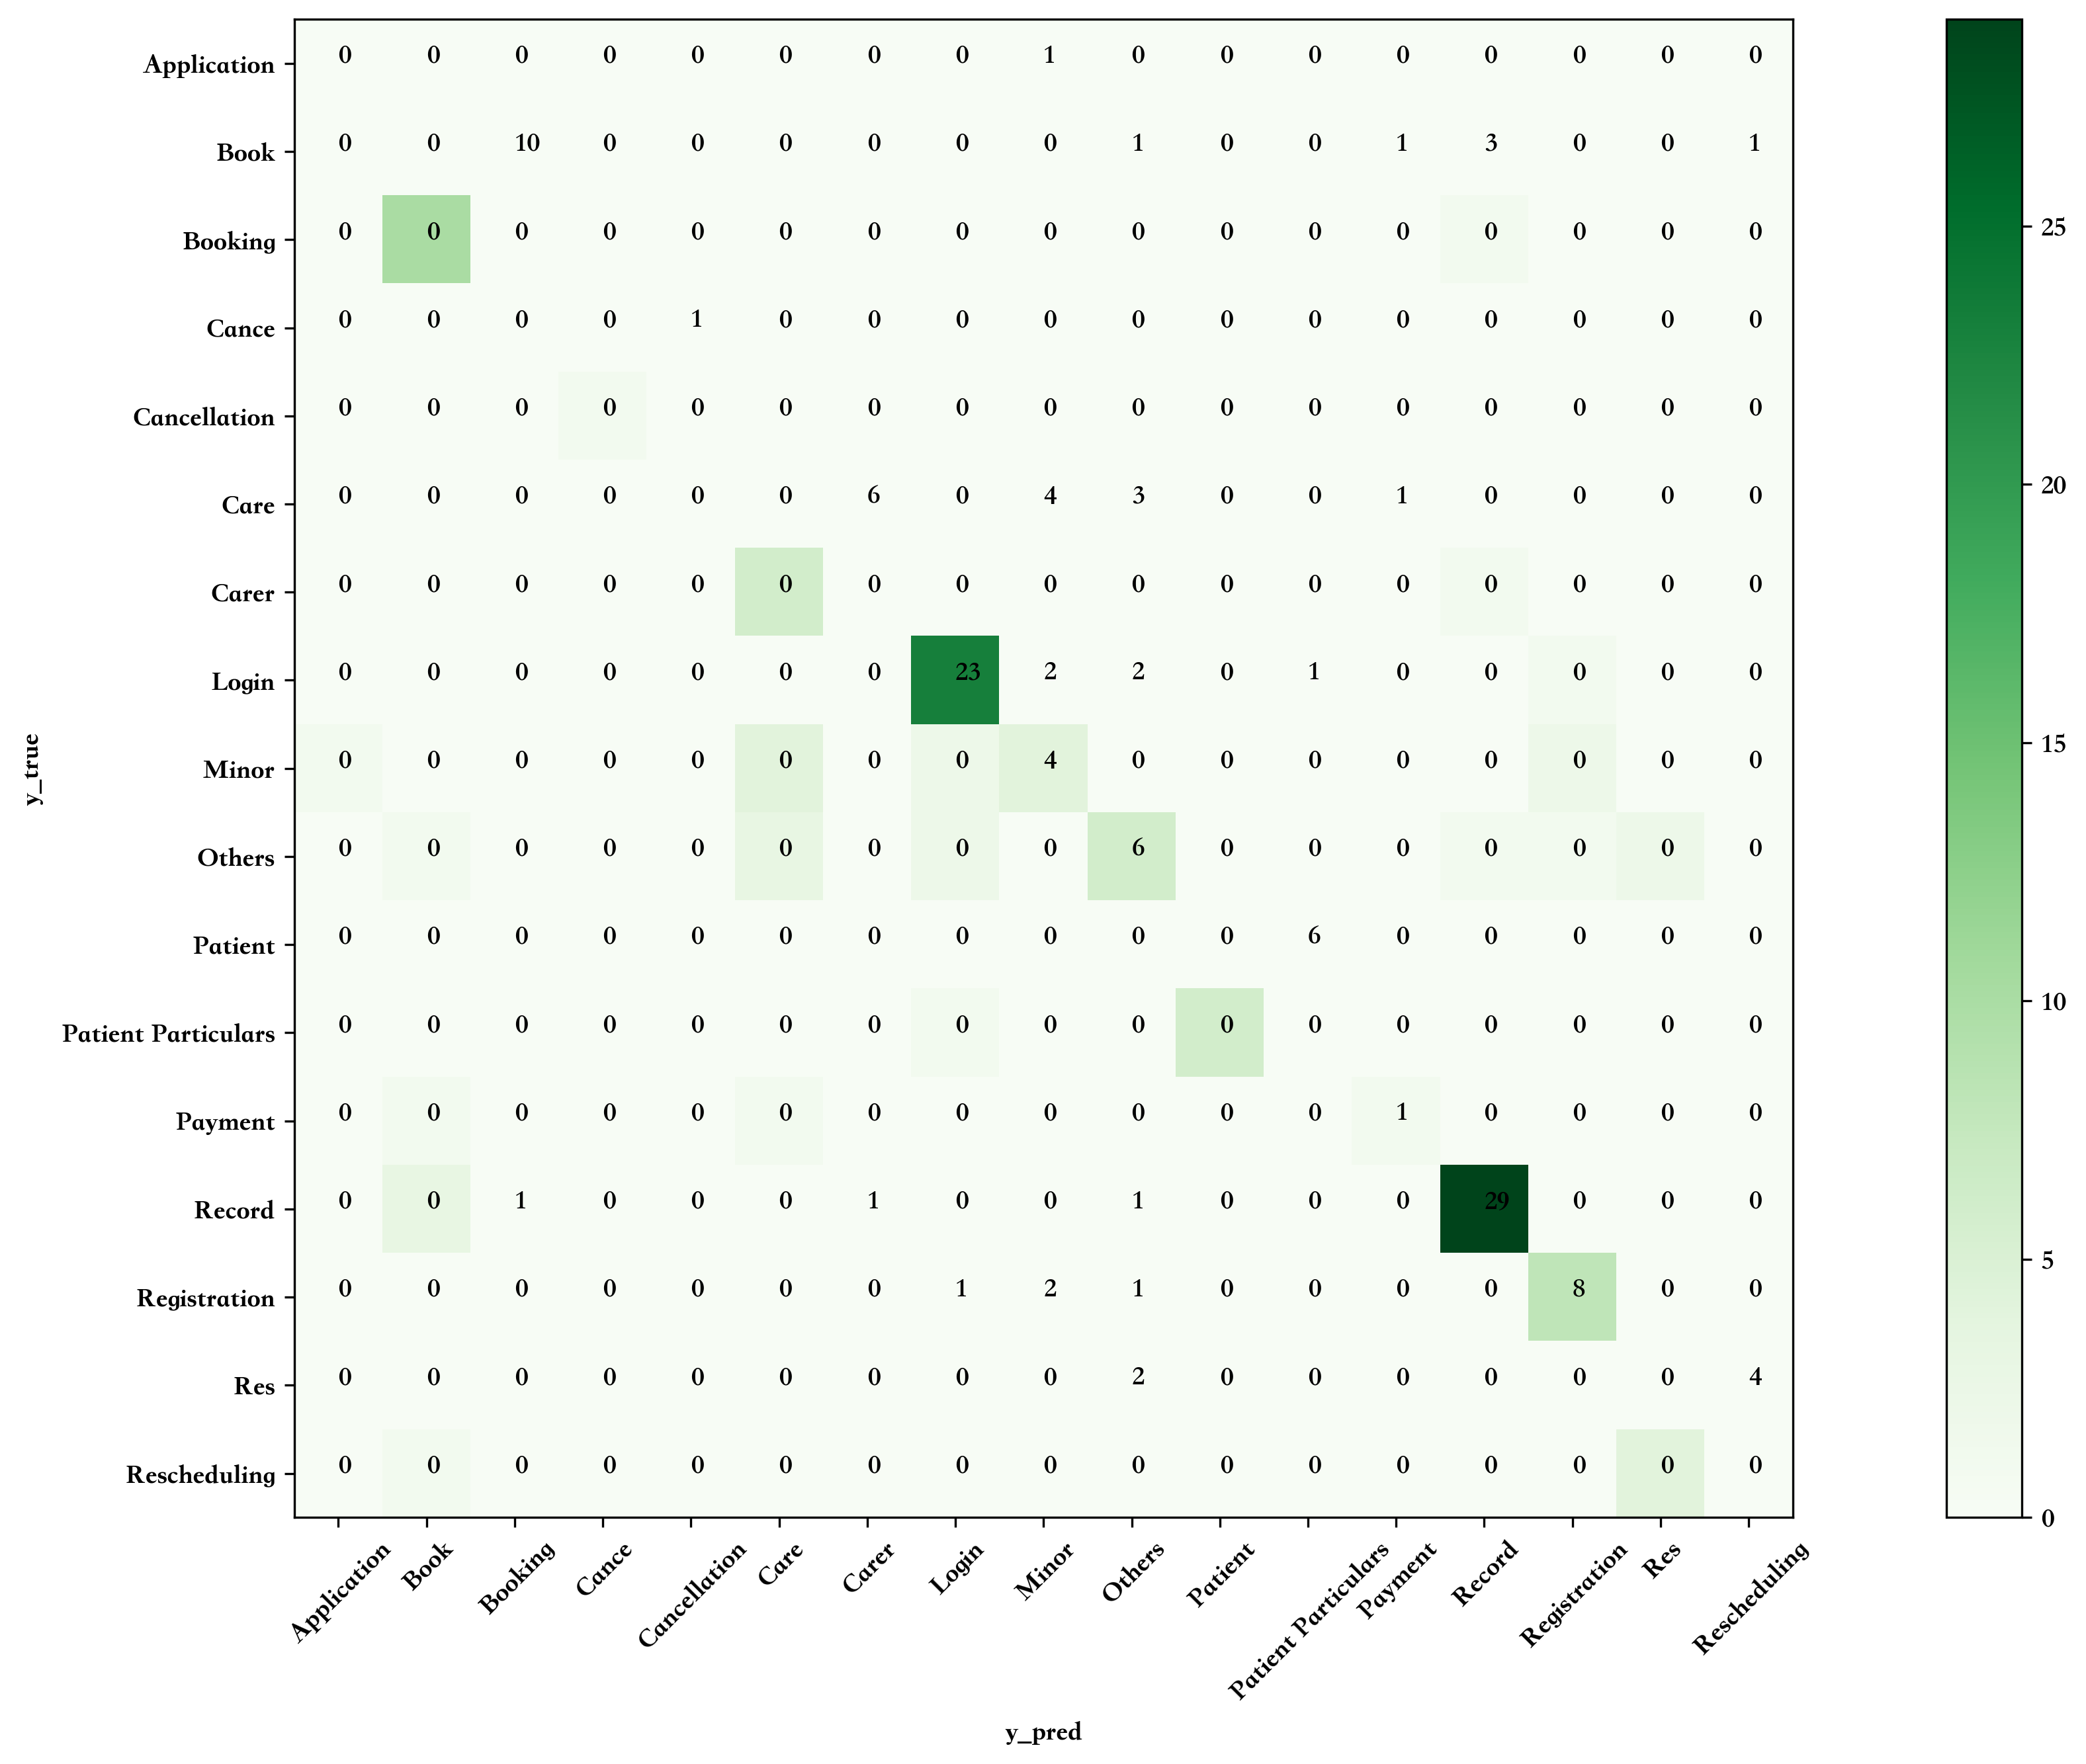

In [94]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl

# ÊîØÊåÅ‰∏≠ÊñáÂ≠ó‰ΩìÊòæÁ§∫, ‰ΩøÁî®‰∫éMacÁ≥ªÁªü
#zhfont=mpl.font_manager.FontProperties(fname="/System/Library/Fonts/Songti SC.ttc")
plt.rcParams['font.sans-serif']=['Songti SC'] #Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ

confusion = confusion_matrix(y_true, y_pred)
#classes = ['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']


# ÁªòÂà∂ÁÉ≠Â∫¶Âõæ
plt.figure(figsize=(20, 10),dpi=300)
plt.imshow(confusion, cmap=plt.cm.Greens)
indices = range(len(confusion))
plt.xticks(indices, classes, rotation=45)
plt.yticks(indices, classes)
# plt.xticks(indices, classes, fontproperties=zhfont)
# plt.yticks(indices, classes, fontproperties=zhfont)
plt.colorbar()
plt.xlabel('y_pred')
plt.ylabel('y_true')

# ÊòæÁ§∫Êï∞ÊçÆ
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])

# ÊòæÁ§∫ÂõæÁâá
plt.show()

In [166]:
ft_model = 'ada:ft-personal-2023-05-30-08-57-22'
 
def ham_spam(text):
     
    # add the suffix ` ->` to the prompt
    input_prompt = text + ' ->'
    response = openai.Completion.create(model=ft_model, prompt=input_prompt, max_tokens=1, temperature=0)
     
    output = response['choices'][0]['text']
    return output
 
# get predictions for the test dataset
test['predictions'] = test['prompt'].apply(lambda x:ham_spam(x))
 
test

prompt     completion  \
0    Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...          Minor   
1                                    ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n         Others   
2                    ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n          Minor   
3                     ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n          Login   
4    Êó©Êô®ÔºåÊàëÂú®Ha go Á∂≤‰∏äÁôªË®ò, ‰ΩÜ‰∏çÊàêÂäü. Âá∫Áèæ??ÈÄôÂÄãÁâàÈù¢„ÄÇÊàëÂÆ∂Âú®ËçîÊûùËßíÔºåÊàëÊáâË©≤ÂéªÈÇ£Ë£°Ëæ¶...   Registration   
..                                                 ...            ...   
122  It is found that incomplete feature descriptio...         Others   
123           Ë´ãÂïèÈªûËß£Áúã‰∏çÂà∞ÊàëÈ©óÈ£≤Á≥ñÊ∞¥Âæå‰πãÂ†±ÂëäÔºà2023.1.10È©óË°ÄÔºâ\n\n###\n\n         Record   
124  ‰Ω†Â•ΩÔºÅ\nË´ãÂïèÁÇ∫‰ΩïÂú®HA go appÂÖßÁöÑMy report ÁÑ°Ê≥ïÊü•ÈóúËøëÂÖ©Âπ¥Âú®ÊîøÂ∫úÈÜ´Èô¢ÂÖßÁöÑÊäΩ...         Record   
125  There is still no update on Report. Example,¬† ...         Record   
126  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...         Record   

       predictions  
0             Care  
1             Care  
2            Login  
3            Login  
4     Registration  
..             ...  
122         Others  
123         Record  
124         Record  
125         Record  
126         Record  

[127 rows x 3 columns]

In [169]:
test.to_csv('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/pred_adaft.csv', encoding='utf_8_sig')

In [172]:
pred_adaft = pd.read_csv('/Users/lucianowang/Documents/Learning/ChatGPT/Classification/pred_adaft.csv')
pred_adaft

Unnamed: 0                                             prompt  \
0             0  Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...   
1             1                                  ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n   
2             2                  ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n   
3             3                   ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n   
4             4  Êó©Êô®ÔºåÊàëÂú®Ha go Á∂≤‰∏äÁôªË®ò, ‰ΩÜ‰∏çÊàêÂäü. Âá∫Áèæ??ÈÄôÂÄãÁâàÈù¢„ÄÇÊàëÂÆ∂Âú®ËçîÊûùËßíÔºåÊàëÊáâË©≤ÂéªÈÇ£Ë£°Ëæ¶...   
..          ...                                                ...   
122         122  It is found that incomplete feature descriptio...   
123         123           Ë´ãÂïèÈªûËß£Áúã‰∏çÂà∞ÊàëÈ©óÈ£≤Á≥ñÊ∞¥Âæå‰πãÂ†±ÂëäÔºà2023.1.10È©óË°ÄÔºâ\n\n###\n\n   
124         124  ‰Ω†Â•ΩÔºÅ\nË´ãÂïèÁÇ∫‰ΩïÂú®HA go appÂÖßÁöÑMy report ÁÑ°Ê≥ïÊü•ÈóúËøëÂÖ©Âπ¥Âú®ÊîøÂ∫úÈÜ´Èô¢ÂÖßÁöÑÊäΩ...   
125         125  There is still no update on Report. Example,¬† ...   
126         126  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...   

        completion    predictions  
0            Minor          Carer  
1           Others          Carer  
2            Minor          Login  
3            Login          Login  
4     Registration   Registration  
..             ...            ...  
122         Others         Others  
123         Record         Record  
124         Record         Record  
125         Record         Record  
126         Record         Record  

[127 rows x 4 columns]

In [173]:
# -*- coding: utf-8 -*-
from sklearn.metrics import classification_report

y_true = pred_adaft['completion'].values
y_pred = pred_adaft['predictions'].values

t = classification_report(y_true, y_pred)

#target_names=['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']

print(t)

                      precision    recall  f1-score   support

         Application       0.00      0.00      0.00         0
             Booking       0.62      0.91      0.74        11
               Cance       0.00      0.00      0.00         0
        Cancellation       0.00      0.00      0.00         1
               Carer       0.43      0.86      0.57         7
               Login       0.82      0.96      0.88        24
               Minor       1.00      0.31      0.47        13
              Others       1.00      0.38      0.55        16
 Patient Particulars       1.00      0.86      0.92         7
             Payment       1.00      0.33      0.50         3
              Record       0.91      0.91      0.91        32
        Registration       0.67      1.00      0.80         8
        Rescheduling       0.67      0.80      0.73         5

            accuracy                           0.76       127
           macro avg       0.62      0.56      0.54       127
      

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_cla

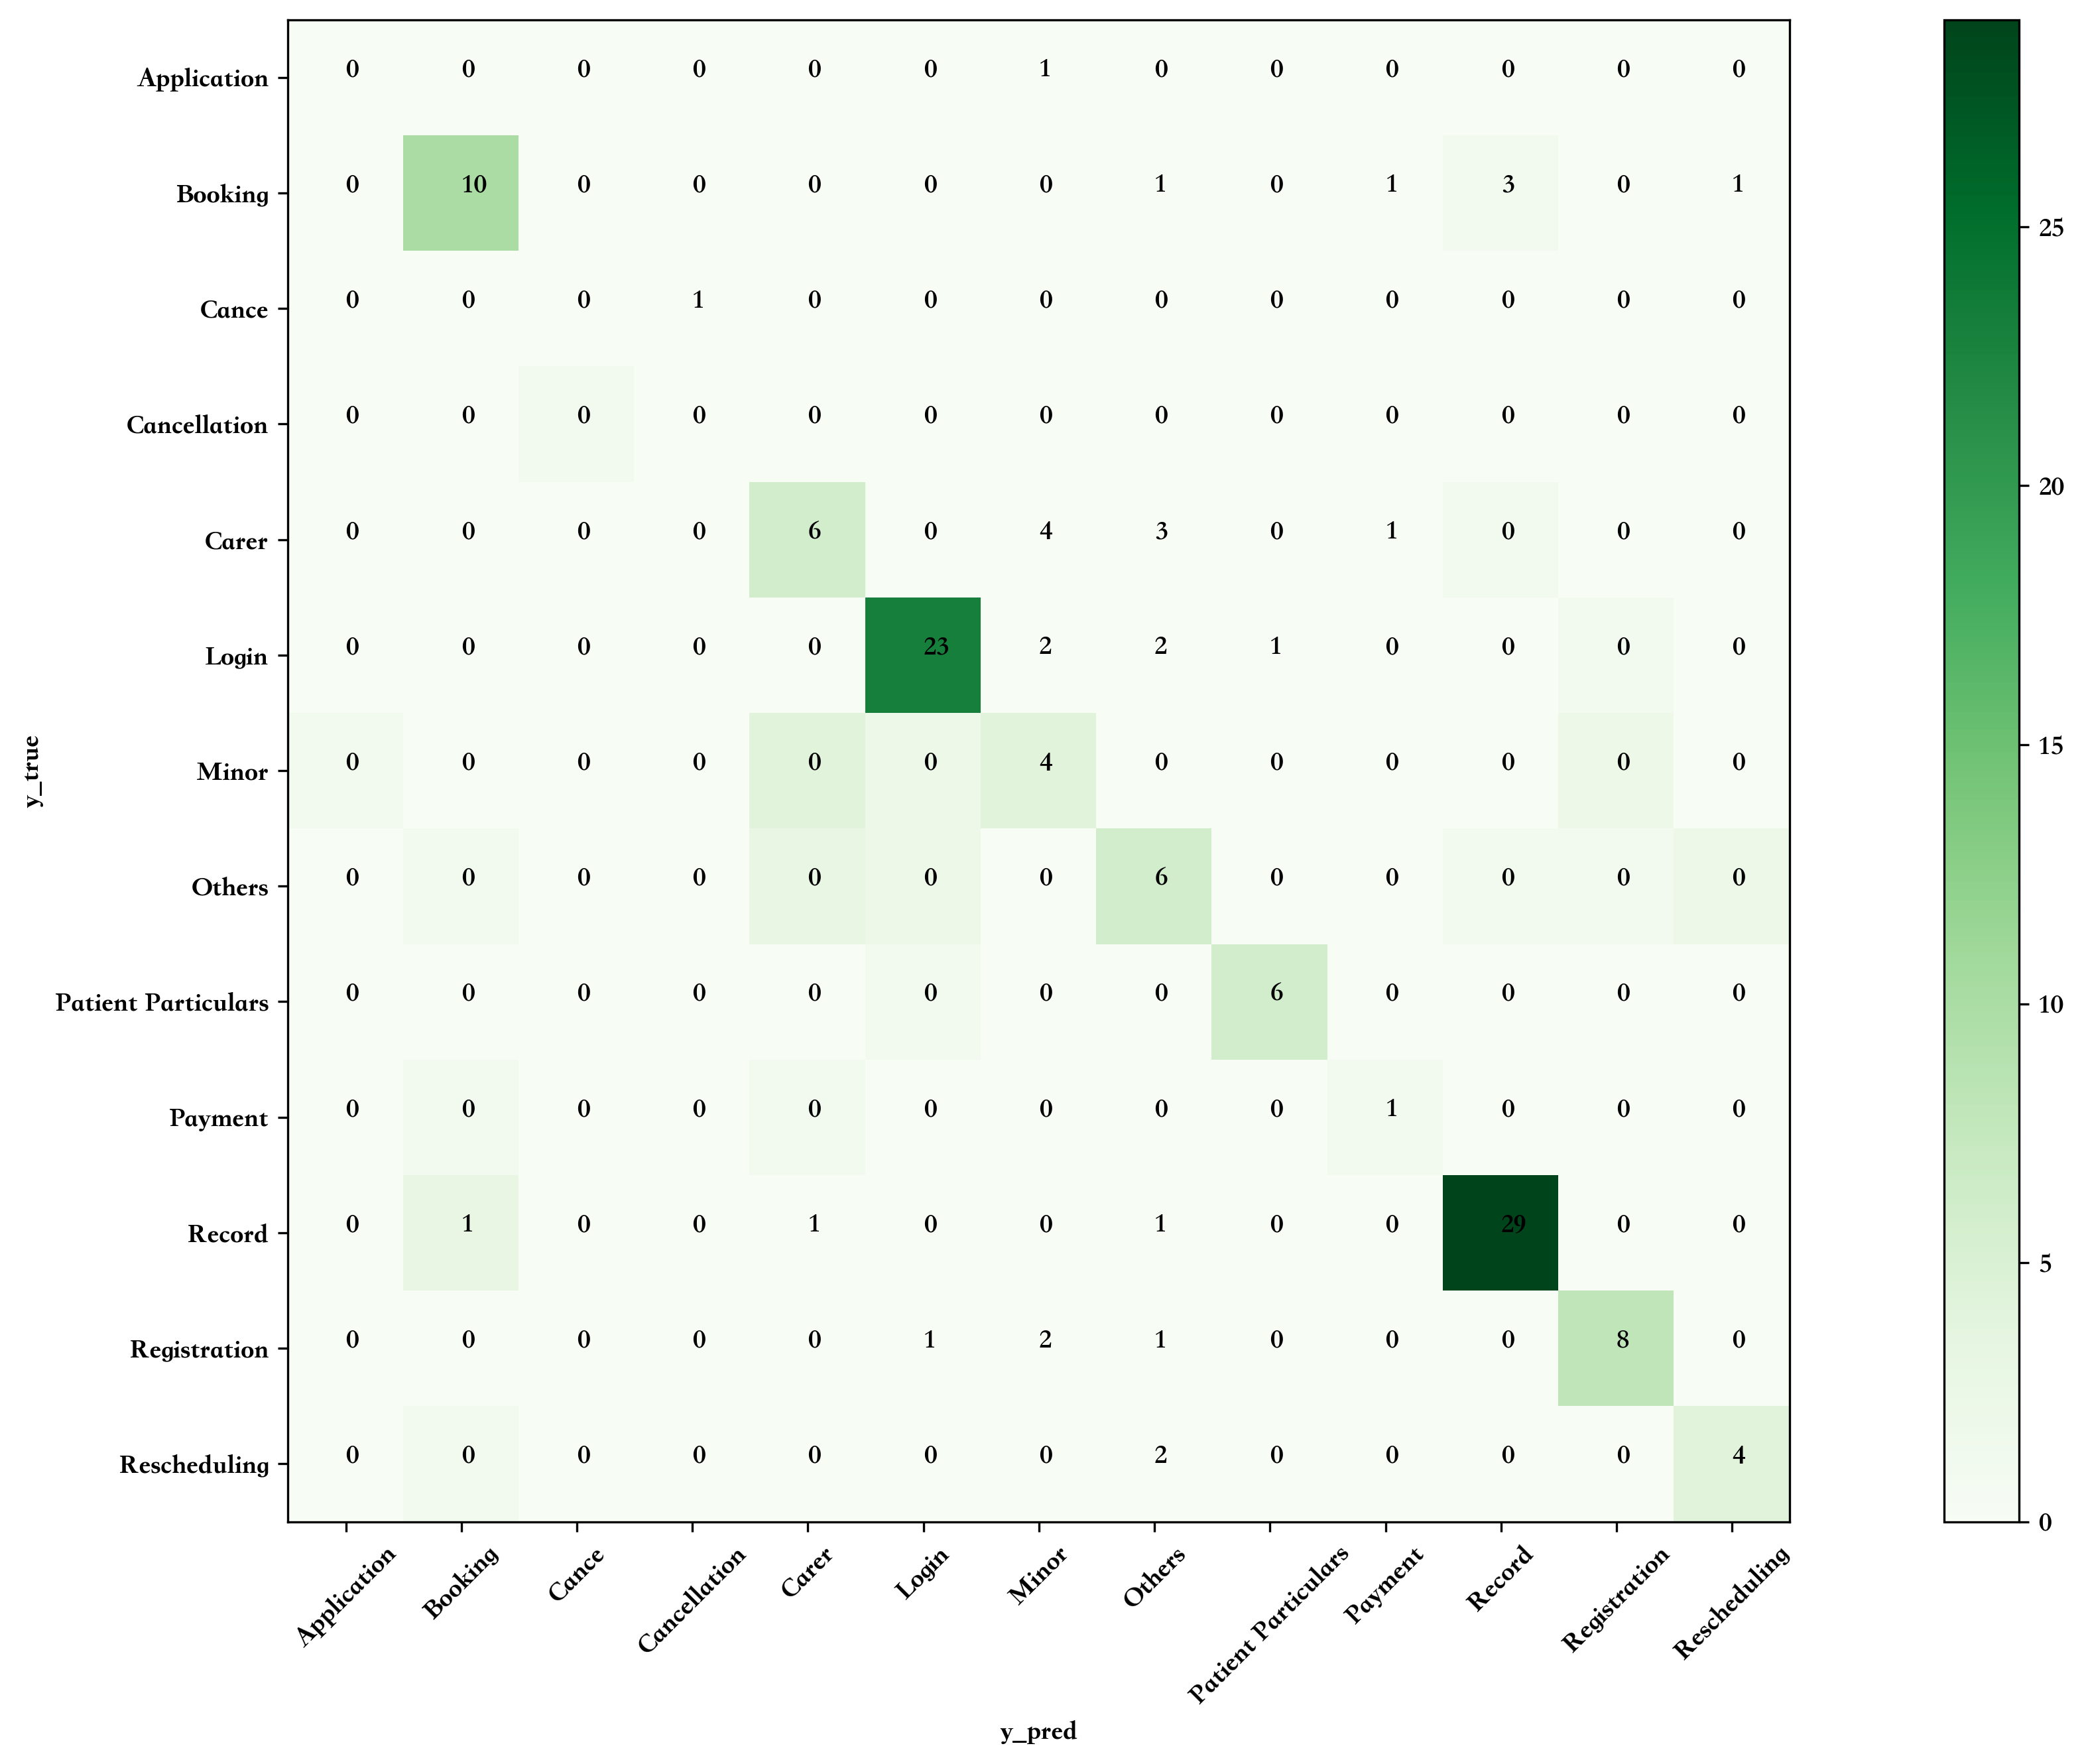

In [176]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl

# ÊîØÊåÅ‰∏≠ÊñáÂ≠ó‰ΩìÊòæÁ§∫, ‰ΩøÁî®‰∫éMacÁ≥ªÁªü
#zhfont=mpl.font_manager.FontProperties(fname="/System/Library/Fonts/Songti SC.ttc")
plt.rcParams['font.sans-serif']=['Songti SC'] #Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ

confusion = confusion_matrix(y_true, y_pred)
classes = ['Application', 'Booking', 'Cance', 'Cancellation', 'Carer', 'Login', 'Minor', 'Others', 'Patient Particulars', 'Payment', 'Record','Registration','Rescheduling']


# ÁªòÂà∂ÁÉ≠Â∫¶Âõæ
plt.figure(figsize=(20, 10),dpi=300)
plt.imshow(confusion, cmap=plt.cm.Greens)
indices = range(len(confusion))
plt.xticks(indices, classes, rotation=45)
plt.yticks(indices, classes)
# plt.xticks(indices, classes, fontproperties=zhfont)
# plt.yticks(indices, classes, fontproperties=zhfont)
plt.colorbar()
plt.xlabel('y_pred')
plt.ylabel('y_true')

# ÊòæÁ§∫Êï∞ÊçÆ
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])

# ÊòæÁ§∫ÂõæÁâá
plt.show()

### ÂÖ∂‰ªñÊé¢Á¥¢

In [12]:
### ÂØπFine-tuingÊï∞ÊçÆËøõË°å‰øÆÊ≠£
df_adjft = pd.read_excel('/Users/lucianowang/Documents/Working/2023YEAR/202306_LLM/02_Áî®Êà∑ÊäïËØâÂàÜÁ±ª/DataProcessing/SampleDataset_11class_adi.xlsx')
df_adjft

Case Description (HAGo)   LABEL
0    Cant login to ha go account nor forgot usernam...   Login
1    ‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ‰ª•Â∞á16Âèä17Ê≠≤È¶ôÊ∏ØÊ∞∏‰πÖ...   Minor
2    Cant login to ha go account nor forgot usernam...   Login
3    ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...   Login
4                                               ÊúâÂÜáËôïÁêÜÁ∑ä?  Others
..                                                 ...     ...
630  ‰Ω†Â•ΩÔºåÊàëÂ™ΩÂ™ΩÊñº2022Âπ¥8ÊúàÂú®ËçÉÁÅ£Êà¥È∫üË∂æË®∫ÊâÄÊäΩË°ÄÔºåÁÇ∫‰ªÄÈ∫ºÂú®HA Go Êâæ‰∏çÂà∞ÈÄô‰ªΩÂåñÈ©óÂ†±ÂëäÔºåË´ã...  Record
631  ‰Ω†Â•ΩÔºÅË´ãÂïèÊàëÂú®HAÂÅö‰∫ÜÈ©óË°ÄÂèäÈ©óÂ∞øÁ≠âÂæåÔºåË¶ÅÂπæÂ§öÂ§©ÊâçÊúâÂ†±ÂëäÔºüËÄåÈÇ£‰∫õÂ†±ÂëäÂèàË¶ÅÂ§öÂ∞ëÂ§©Êâç‰∏äÂÇ≥Âà∞ÊàëÁöÑHA...  Record
632  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...  Record
633  Ë´ãÂïèHA Go „ÄåÊàëÁöÑÂÅ•Â∫∑„ÄçÂÖßÁöÑ„ÄåÊàëÁöÑÁ¥ÄÈåÑ„ÄçÂÖß„ÄåÊàëÁöÑÂ†±Âëä„ÄçÁöÑÈ©óË°ÄÂ†±ÂëäÁùáÈÜ´ÁîüÂæåÂπæÊôÇÊúÉÊîæ‰∏äHA ...  Record
634  Hi,¬† \nÁÇ∫ÁîöÈ∫ºÈ©óË°ÄÂåñÈ©óÂ†±ÂëäÊúâÈóúLipid ProfileÔºåGlu. FastingÈ†ÖÊ≤í...  Record

[635 rows x 2 columns]

In [13]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing

category = df_adjft['LABEL']

le = preprocessing.LabelEncoder()
le.fit(category)
list(le.classes_) # Êü•ÁúãÊ†áÁ≠æÂéªÈáçÂêéÁöÑÁ±ªÂà´

['Booking',
 'Cancellation',
 'Carer',
 'Login',
 'Minor',
 'Others',
 'Patient Particulars',
 'Payment',
 'Record',
 'Registration',
 'Rescheduling']

In [40]:
le.transform(list(le.classes_))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [38]:
# # Ê†áÁ≠æÂÄºËΩ¨ÂåñÔºåÂèØ‰ª•ÁêÜËß£‰∏∫ÔºåÂ∞ÜÈùûÊï∞Â≠óÊ†áÁ≠æÊò†Â∞ÑÂà∞Êï∞Â≠óÊ†áÁ≠æ
LABEL_NUM = le.transform(category)

array([ 3,  4,  3,  3,  5,  6,  3,  6,  3,  3,  3,  3,  5,  9,  4,  3,  9,
        3,  9,  9,  2,  3,  4,  4,  4,  5,  6,  4,  9,  2,  9,  3,  9,  9,
        9,  3,  3,  3,  6,  9,  3,  9,  4,  4,  9,  9,  5,  9,  3,  6,  3,
        5,  5,  4,  4,  3,  6,  3,  9,  3,  3,  9,  3,  2,  3,  2,  2,  4,
        9,  9,  3,  4,  5,  9,  3,  2,  6,  9,  9,  3,  4,  3,  3,  3,  3,
        6,  3,  3,  3,  2,  2,  3,  9,  3,  3,  5,  3,  3,  3,  6,  3,  3,
        4,  2,  2,  2,  3,  9,  3,  9,  3,  2,  2,  9,  5,  3,  3,  5,  9,
        3,  4,  2,  3,  3,  5,  9,  5,  5,  5,  9,  6,  6,  4,  3,  3,  3,
        3,  9,  4,  3,  6,  9,  3,  2,  2,  6,  3,  5,  6,  3,  3,  3,  3,
        9,  2,  9,  6,  6,  3,  4,  4,  2,  3,  3,  2,  6,  3,  5,  6,  4,
        2,  9,  5,  3,  6,  9,  3,  6,  9,  2,  2,  2,  3,  4,  6,  6,  5,
        6,  9,  5,  3,  5,  9,  6,  3,  2,  6,  2,  6,  6,  6,  2,  5,  5,
        3,  3,  3,  4,  3,  6,  9,  6,  6,  8,  9,  2,  3,  4,  4,  3,  9,
        4,  3,  3,  5,  3

In [15]:
# # ÂèçËΩ¨ÂåñÔºåÂ∞ÜÊï∞Â≠óÊ†áÁ≠æËøòÂéü‰∏∫ÈùûÊï∞Â≠óÊ†áÁ≠æ
LABEL = list(le.inverse_transform(LABEL_NUM))

In [32]:
LABEL = list(le.inverse_transform('5'))
LABEL

ValueError: y should be a 1d array, got an array of shape () instead.

In [16]:
df_adj_ft = pd.DataFrame(df_adjft, columns=['Case Description (HAGo)'])
df_adj_ft['LABEL_NUM'] = LABEL_NUM
df_adj_ft
df_adj_ft.columns = ['prompt','completion'] #[:300]
df_adj_ft.head()

prompt  completion
0  Cant login to ha go account nor forgot usernam...           3
1  ‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ‰ª•Â∞á16Âèä17Ê≠≤È¶ôÊ∏ØÊ∞∏‰πÖ...           4
2  Cant login to ha go account nor forgot usernam...           3
3  ‰Ω†Â•ΩÔºåÊàëÁôªÂÖ•ÂîîÂà∞HA GOÂ∏≥Êà∂ÔºåÂ∑≤Á∂ìÂòóË©¶ÂéªÈÜ´Èô¢ÊàñË®∫ÊâÄÊ´ÉÊ™ØÊ±ÇÂä©‰ΩÜËÅ∑Âì°ÈÉΩË©±Âπ´ÂîîÂà∞ÊàëÔºåË©¶ÈÅéÂπæÊ¨°se...           3
4                                             ÊúâÂÜáËôïÁêÜÁ∑ä?           5

In [17]:
## ËΩ¨Êç¢‰∏∫json
df_adj_ft.to_json("complain_sample.jsonl", orient='records', lines=True)

In [18]:
!openai tools fine_tunes.prepare_data -f complain_sample.jsonl -q

Analyzing...

- Your file contains 635 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 4 duplicated prompt-completion sets. These are rows: [9, 407, 448, 618]
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples. If you intend to do open-ended generation, then you should leave the prompts empty
- The completion should start with a whitespace character (` `). This tends to produce better results due to the tokenization we use.

In [20]:
!openai --api-key '***' api fine_tunes.create -t "complain_sample_prepared_train (1).jsonl" -v "complain_sample_prepared_valid (1).jsonl" --compute_classification_metrics --classification_n_classes 11 -m ada

Upload progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112k/112k [00:00<00:00, 51.4Mit/s]
Uploaded file from complain_sample_prepared_train (1).jsonl: file-v1uoOgNYt8X8FzWh1r5XR9AH
Upload progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 22.3k/22.3k [00:00<00:00, 14.7Mit/s]
Uploaded file from complain_sample_prepared_valid (1).jsonl: file-n4M8XLqmlSTdwfFaXXaP4Mch
Created fine-tune: ft-urahNveEjxzxEGiNHzTQKv5A
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-20 15:15:37] Created fine-tune: ft-urahNveEjxzxEGiNHzTQKv5A



In [25]:
!openai --api-key '***' api fine_tunes.follow -i ft-urahNveEjxzxEGiNHzTQKv5A

[2023-06-20 15:15:37] Created fine-tune: ft-urahNveEjxzxEGiNHzTQKv5A
[2023-06-20 15:17:24] Fine-tune costs $0.09
[2023-06-20 15:17:24] Fine-tune enqueued. Queue number: 10
[2023-06-20 15:23:57] Fine-tune is in the queue. Queue number: 9
[2023-06-20 15:30:15] Fine-tune is in the queue. Queue number: 8
[2023-06-20 15:33:21] Fine-tune is in the queue. Queue number: 7
[2023-06-20 15:34:25] Fine-tune is in the queue. Queue number: 6
[2023-06-20 15:34:32] Fine-tune is in the queue. Queue number: 5
[2023-06-20 15:35:35] Fine-tune is in the queue. Queue number: 4
[2023-06-20 15:37:41] Fine-tune is in the queue. Queue number: 3
[2023-06-20 15:38:15] Fine-tune is in the queue. Queue number: 2
[2023-06-20 15:40:20] Fine-tune is in the queue. Queue number: 1
[2023-06-20 15:42:33] Fine-tune is in the queue. Queue number: 0
[2023-06-20 15:42:36] Fine-tune started
[2023-06-20 15:44:08] Completed epoch 1/4
[2023-06-20 15:45:30] Completed epoch 2/4
[2023-06-20 15:46:50] Completed epoch 3/4
[2023-06-20 

In [26]:
!openai api fine_tunes.results -i ft-urahNveEjxzxEGiNHzTQKv5A > '/Users/lucianowang/Documents/Working/2023YEAR/202306_LLM/02_Áî®Êà∑ÊäïËØâÂàÜÁ±ª/DataProcessing/result.csv'

In [200]:
# and other information
# openai api fine_tunes.get -i <YOUR_FINE_TUNE_JOB_ID>

# Cancel a job
!openai api fine_tunes.cancel -i file-ilV3LFcgTyEjRJxNVXHNSNwm

Error: No fine-tune job: file-ilV3LFcgTyEjRJxNVXHNSNwm (HTTP status code: 404)


In [27]:
results = pd.read_csv('result.csv')
results[results['classification/accuracy'].notnull()].tail(1)

step  elapsed_tokens  elapsed_examples  training_loss  \
2020  2021          238765              2021       0.016732   

      training_sequence_accuracy  training_token_accuracy  validation_loss  \
2020                         1.0                      1.0              NaN   

      validation_sequence_accuracy  validation_token_accuracy  \
2020                           NaN                        NaN   

      classification/accuracy  classification/weighted_f1_score  
2020                 0.795276                          0.789923

In [28]:
ft_model = 'ada:ft-personal-2023-06-20-07-48-30'
 
def ham_spam(text):
     
    # add the suffix ` ->` to the prompt
    input_prompt = text + '\n\n###\n\n'
    response = openai.Completion.create(model=ft_model, prompt=input_prompt, max_tokens=1, temperature=0, top_p=1,
           frequency_penalty=0, 
           presence_penalty=0)
     
    output = response['choices'][0]['text']
    return output
 
# get predictions for the test dataset
test['predictions'] = test['prompt'].apply(lambda x:ham_spam(x))
 
test

prompt     completion  \
0    Dear Sir, \n‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ...          Minor   
1                                    ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n         Others   
2                    ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n          Minor   
3                     ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n          Login   
4    Êó©Êô®ÔºåÊàëÂú®Ha go Á∂≤‰∏äÁôªË®ò, ‰ΩÜ‰∏çÊàêÂäü. Âá∫Áèæ??ÈÄôÂÄãÁâàÈù¢„ÄÇÊàëÂÆ∂Âú®ËçîÊûùËßíÔºåÊàëÊáâË©≤ÂéªÈÇ£Ë£°Ëæ¶...   Registration   
..                                                 ...            ...   
122  It is found that incomplete feature descriptio...         Others   
123           Ë´ãÂïèÈªûËß£Áúã‰∏çÂà∞ÊàëÈ©óÈ£≤Á≥ñÊ∞¥Âæå‰πãÂ†±ÂëäÔºà2023.1.10È©óË°ÄÔºâ\n\n###\n\n         Record   
124  ‰Ω†Â•ΩÔºÅ\nË´ãÂïèÁÇ∫‰ΩïÂú®HA go appÂÖßÁöÑMy report ÁÑ°Ê≥ïÊü•ÈóúËøëÂÖ©Âπ¥Âú®ÊîøÂ∫úÈÜ´Èô¢ÂÖßÁöÑÊäΩ...         Record   
125  There is still no update on Report. Example,¬† ...         Record   
126  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...         Record   

    predictions  
0             4  
1             5  
2             4  
3             3  
4             9  
..          ...  
122           5  
123           8  
124           8  
125           8  
126           8  

[127 rows x 3 columns]

In [29]:
import pandas as pd
import openai
import os
 
# load the validation dataset
test = pd.read_json("complain_sample_prepared_valid (1).jsonl", lines=True)
test.head()

prompt  completion
0  ‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ‰ª•Â∞á16Âèä17Ê≠≤È¶ôÊ∏ØÊ∞∏‰πÖ...           4
1                                  ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n           5
2     ‰ªÄÈ∫ºÊòØ ‚ÄúHA go Ê≠£ÂºèÊúÉÂì°‚Äù ÊâçÂèØ‰ª•Áî≥Ë´ãÂª∂ÊúüÔºüÂ¶Ç‰ΩïÊàêÁÇ∫ Ê≠£ÂºèÊúÉÂì°Ôºü\n\n###\n\n           9
3                  ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n           4
4                   ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n           3

In [31]:
ft_model = 'ada:ft-personal-2023-06-20-07-48-30'
 
def ham_spam(text):
     
    # add the suffix ` ->` to the prompt
    input_prompt = text + '\n\n###\n\n'
    response = openai.Completion.create(model=ft_model, prompt=input_prompt, max_tokens=1, temperature=0, top_p=1,
           frequency_penalty=0, 
           presence_penalty=0)
     
    output = response['choices'][0]['text']
    return output
 
# get predictions for the test dataset
test['predictions'] = test['prompt'].apply(lambda x:ham_spam(x))
 
test

prompt  completion predictions
0    ‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ‰ª•Â∞á16Âèä17Ê≠≤È¶ôÊ∏ØÊ∞∏‰πÖ...           4           4
1                                    ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n           5           5
2       ‰ªÄÈ∫ºÊòØ ‚ÄúHA go Ê≠£ÂºèÊúÉÂì°‚Äù ÊâçÂèØ‰ª•Áî≥Ë´ãÂª∂ÊúüÔºüÂ¶Ç‰ΩïÊàêÁÇ∫ Ê≠£ÂºèÊúÉÂì°Ôºü\n\n###\n\n           9          10
3                    ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n           4           4
4                     ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n           3           3
..                                                 ...         ...         ...
122  It is found that incomplete feature descriptio...           5           5
123       Ë´ãÂïèÊ™¢È©óÂ†±ÂëäÂ§ö‰πÖÊúÉÊõ¥Êñ∞Ôºü Â∑≤Âá∫ÁöÑÊ™¢È©óÂ†±ÂëäÂú®ha go Áúã‰∏çÂà∞ Ë¨ùË¨ù\n\n###\n\n           8           8
124           Ë´ãÂïèÈªûËß£Áúã‰∏çÂà∞ÊàëÈ©óÈ£≤Á≥ñÊ∞¥Âæå‰πãÂ†±ÂëäÔºà2023.1.10È©óË°ÄÔºâ\n\n###\n\n           8           8
125  There is still no update on Report. Example,¬† ...           8           8
126  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...           8           8

[127 rows x 3 columns]

In [33]:
test.to_csv('/Users/lucianowang/Documents/Working/2023YEAR/202306_LLM/02_Áî®Êà∑ÊäïËØâÂàÜÁ±ª/DataProcessing/pred_adaft.csv', encoding='utf_8_sig')

In [36]:
pred_adaft = pd.read_csv('/Users/lucianowang/Documents/Working/2023YEAR/202306_LLM/02_Áî®Êà∑ÊäïËØâÂàÜÁ±ª/DataProcessing/pred_adaft.csv')
pred_adaft

Unnamed: 0                                             prompt  \
0             0  ‰Ω†ÂÄëÂõûË¶ÜÊôÇÈñìÂ§™‰πÖÔºåÂèàÊ≤°Ëß£Ê±∫Âà∞ÂïèÈ°åÔºåÊàëÂÖíÂ≠êÊòØ16Ê≠≤ÔºåÈõ£Â∫¶‰Ω†ÂÄëÁ≥ªÁµ±Á´üÁÑ∂ÂèØ‰ª•Â∞á16Âèä17Ê≠≤È¶ôÊ∏ØÊ∞∏‰πÖ...   
1             1                                  ÊúâÂÜáËôïÁêÜÁ∑ä?\n\n###\n\n   
2             2     ‰ªÄÈ∫ºÊòØ ‚ÄúHA go Ê≠£ÂºèÊúÉÂì°‚Äù ÊâçÂèØ‰ª•Áî≥Ë´ãÂª∂ÊúüÔºüÂ¶Ç‰ΩïÊàêÁÇ∫ Ê≠£ÂºèÊúÉÂì°Ôºü\n\n###\n\n   
3             3                  ÁóÖ‰∫∫17Ê≠≤‰∏çËÉΩÂä†ÂÖ•ÂÆ∂Èï∑Êà∂Âè£ÔºåÂèà‰∏çËÉΩËá™Â∑±ÈñãÊà∂Âè£\n\n###\n\n   
4             4                   ÊàëÂøòË®òÁôªÂÖ•ÂêçÁ®±‰ΩÜÂõ†Â∑≤ÈÅ∫Â§±ÈõªË©±‰∏çËÉΩÁî®ÈõªË©±Ë™çË≠â\n\n###\n\n   
..          ...                                                ...   
122         122  It is found that incomplete feature descriptio...   
123         123       Ë´ãÂïèÊ™¢È©óÂ†±ÂëäÂ§ö‰πÖÊúÉÊõ¥Êñ∞Ôºü Â∑≤Âá∫ÁöÑÊ™¢È©óÂ†±ÂëäÂú®ha go Áúã‰∏çÂà∞ Ë¨ùË¨ù\n\n###\n\n   
124         124           Ë´ãÂïèÈªûËß£Áúã‰∏çÂà∞ÊàëÈ©óÈ£≤Á≥ñÊ∞¥Âæå‰πãÂ†±ÂëäÔºà2023.1.10È©óË°ÄÔºâ\n\n###\n\n   
125         125  There is still no update on Report. Example,¬† ...   
126         126  ÊñΩÂ∞èÂßêÊü•Ë©¢Âú®‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåÈúÄË¶ÅÂú®Â†±ÂëäÁµêÊûúÁôºÂá∫ÂæåÂ§ö‰πÖÔºåÊâçËÉΩÂú®Êú¨Â±ÄÊµÅÂãïÊáâÁî®Á®ãÂºè„ÄåHA Go„ÄçÊü•Èñ±Âèä...   

     completion  predictions  
0             4            4  
1             5            5  
2             9           10  
3             4            4  
4             3            3  
..          ...          ...  
122           5            5  
123           8            8  
124           8            8  
125           8            8  
126           8            8  

[127 rows x 4 columns]

In [37]:
# -*- coding: utf-8 -*-
from sklearn.metrics import classification_report

y_true = pred_adaft['completion'].values
y_pred = pred_adaft['predictions'].values

t = classification_report(y_true, y_pred)

#target_names=['Record', 'Login', 'Registration', 'Booking', 'Others', 'Patient Particulars', 'Carer', 'Minor', 'Rescheduling', 'Payment', 'Cancellation']

print(t)

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.50      0.50      0.50         2
           2       0.88      0.58      0.70        12
           3       1.00      0.71      0.83        21
           4       0.70      0.78      0.74         9
           5       0.50      0.67      0.57        12
           6       0.62      1.00      0.77         5
           7       0.00      0.00      0.00         1
           8       0.89      0.80      0.84        30
           9       0.67      0.75      0.71        16
          10       0.56      0.83      0.67         6

    accuracy                           0.73       127
   macro avg       0.63      0.67      0.64       127
weighted avg       0.76      0.73      0.74       127



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
